<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#f5cd07;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
SkyPredict: Air Passenger Demand Forecasting 🛫 🛩 </h1></center>    

</div>

<p align="center">
  <img width="700" height="400" src="https://btl-company.com/wp-content/uploads/2020/02/shutterstock_1033826125-1024x683.jpg">
</p>

## Table of Contents

***

- [Introduction to the Project and Time Series](#Introduction)
- [1. Import Libraries and Data](#Import_Libraries_and_Data)
- [2. Checking for Missing Values](#Checking_Missing_Values)
- [3. Data Analysis and Visualization](#Data_Analysis_and_Visualization)
- [4. Decomposition](#Decomposition)
- [5. Data Stationarization](#Data_Stationarization)
- [6. Dataset Splitting](#Dataset_Splitting)
- [7. Autoregressive Model (AR)](#AR)
- [8. Autoregressive Moving Average Model (ARMA)](#ARMA)
- [9. Long Short-Term Memory Model (LSTM)](#LSTM)
- [10. Model Comparison](#Model_Comparison)

# <a name='Introduction'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Introduction to the Project and Time Series</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

**Project Description: Time Series Forecasting for Air Passenger Demand Forecasting**

This project focuses on forecasting air passenger demand using time series analysis and machine learning models, such as AR, ARMA, and LSTM. By predicting future passenger numbers based on historical data, this project provides valuable insights into the dynamic nature of air travel, which can help various stakeholders in the aviation, logistics, and supply chain sectors to make informed decisions.

**Importance of This Project:**

1. **Improved Resource Allocation**:
   Accurate forecasting of air passenger demand is essential for airlines and airports to allocate resources effectively. By anticipating fluctuations in demand, airlines can optimize flight schedules, staff deployment, and fleet management, ensuring they are adequately prepared to handle peak travel seasons and periods of low demand. This leads to improved operational efficiency, reduced operational costs, and enhanced customer satisfaction.

2. **Better Supply Chain Planning**:
   In logistics, precise demand forecasting is key to streamlining supply chains. For example, airlines can better manage cargo capacity by understanding how passenger demand correlates with cargo demand. If passenger flights are expected to be full, airlines can adjust their cargo capacity accordingly. Additionally, airports can better plan their facilities, including baggage handling systems, check-in counters, and security measures, to accommodate fluctuating passenger volumes.

3. **Revenue Management and Pricing Optimization**:
   Air passenger demand forecasting allows airlines to implement more effective pricing strategies. By understanding the demand curve and predicting future trends, airlines can dynamically adjust ticket prices to maximize revenue. During high-demand periods, prices can be adjusted to reflect the increased willingness to pay, while during off-peak periods, discounts and promotions can be offered to attract more passengers.

4. **Enhancing Customer Experience**:
   Predictive models help airlines and airports prepare for periods of congestion or high demand, allowing them to proactively manage customer expectations. For instance, when demand is predicted to be high, airlines can ensure sufficient flight availability, reduce cancellations, and offer better customer service. Conversely, during low-demand times, airlines can optimize their operations to provide more personalized and cost-effective services.

5. **Supply Chain Resilience**:
   In times of unexpected events, such as pandemics, natural disasters, or geopolitical crises, forecasting models can help the aviation sector respond quickly. For example, if travel demand suddenly drops, airlines can make real-time decisions on fleet adjustments, flight cancellations, and route planning, minimizing financial losses and optimizing resource utilization.

6. **Informed Decision-Making**:
   By comparing different forecasting models (such as AR, ARMA, and LSTM), this project helps decision-makers understand which models provide the most accurate predictions and insights for their specific needs. These insights can guide strategies for fleet management, staffing, airport operations, and long-term planning, making the air travel industry more agile and responsive to market changes.

**Relevance for Supply Chain and Logistics**:

In the broader context of logistics, predicting passenger demand is not only about managing flights but also about ensuring that the entire logistics network functions efficiently:

- **Cargo Management**: Airlines often transport cargo along with passengers. Forecasting passenger numbers helps predict the volume of cargo, leading to better utilization of cargo hold capacity and more efficient scheduling of freight shipments.
- **Airport Operations**: Accurate predictions of passenger flows can improve airport logistics, ensuring that check-in counters, baggage handling, and customs clearance processes are adequately prepared to handle varying passenger numbers. This contributes to reduced delays, faster turnaround times, and better overall customer service.
- **Maintenance Scheduling**: Aircraft maintenance is often scheduled based on demand forecasts. A well-predicted downturn in passenger traffic allows airlines to plan maintenance more effectively, minimizing downtime and optimizing fleet utilization.

In conclusion, this project provides critical insights into the air travel industry by using time series forecasting techniques to predict passenger demand. The impact of such predictions extends far beyond just airlines, providing value across the entire supply chain and logistics network, from cargo management and airport operations to resource optimization and pricing strategies.

**1. What is Time series analysis?**

Time Series is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.

**2. Why & where Time Series is used?**

Time series data can be analysed in order to extract meaningful statistics and other charecteristsics. It's used in atleast the 4 scenarios:

a) Business Forecasting

b) Understand past behavior

c) Plan the future

d) Evaluate current accomplishment

**3. When shouldn't we use Time Series Analysis?**

We don't need to apply Time series in at least the following 2 cases:

a) The dependant variable(y) (that is supposed to vary with time) is constant. Eq: y=f(x)=4, a line parallel to x-axis(time) will always remain the same.

b) The dependant variable(y) represent values that can be denoted as a mathematical function. Eq: sin(x), log(x), Polynomials etc. Thus, we can directly get value at some time using the function itself.

# <a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1. Import Libraries and Data</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [1]:
# Import necessary libraries
import pandas as pd  # For handling data and time series
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import matplotlib.dates as mdates  # For working with dates in matplotlib
plt.style.use('fivethirtyeight')  # Use 'fivethirtyeight' style for matplotlib

# Import statistical libraries for analysis
from scipy import stats  # For statistical functions like probability distributions
import pylab  # For basic plotting functions (used with stats)
import math  # For mathematical operations (e.g., logarithm, square root)
import statsmodels.api as sm  # For statistical models and time series analysis
from statsmodels.tsa.stattools import adfuller  # For Augmented Dickey-Fuller test (stationarity test)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For ACF and PACF plots (autocorrelation analysis)

# Import transformations and statistical tests
from scipy.special import boxcox, inv_boxcox  # For Box-Cox transformation and inverse transformation
from scipy import stats  # For statistical tests (like shapiro, t-test, etc.)

# Import ARIMA model from statsmodels for time series forecasting
from statsmodels.tsa.arima.model import ARIMA

# Import functions for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating model performance

# Machine Learning models and tools
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing
from sklearn.preprocessing import MinMaxScaler  # For scaling the data
from keras.layers import Input, LSTM, Dense  # For building the LSTM model in Keras
from keras.models import Model  # To define and compile Keras models
from tensorflow.keras.utils import plot_model  # For plotting model architecture
from keras.callbacks import ModelCheckpoint  # For saving the best model during training
from keras.models import load_model  # For loading a previously trained model

# Suppress warnings for cleaner output during model training and evaluation
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings (e.g., during model fitting, etc.)

In [2]:
# Read the dataset from CSV file
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'])  # Load the 'AirPassengers.csv' and parse 'Month' column as datetime

# <a name='Checking_Missing_Values'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
2. Checking for Missing Values</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

let's find if we have missing values in the dataset.

In [3]:
# Check for missing values in the dataset
data.isnull().sum()  # Returns the number of missing (NaN) values for each column in the dataset

,0
Month,0
#Passengers,0


let's find if we have duplicate rows.

In [4]:
# Check for duplicated rows in the dataset
data.duplicated().sum()  # Returns the number of duplicated rows in the dataset

0

# <a name='Data_Analysis_and_Visualization'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
3. Data Analysis and Visualization</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [5]:
# Display the first 7 rows of the dataset
data.head(7)  # Returns the first 7 rows of the dataset to inspect the initial entries

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148


In [6]:
# Check the shape (number of rows and columns) of the dataset
data.shape  # Returns a tuple (rows, columns), which helps you understand the size of the dataset

(144, 2)

In [7]:
# Display the summary of the dataset's structure
data.info()  # Provides detailed information about the dataset, including column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
# Get a statistical summary of the dataset
data.describe()  # Returns a summary of statistics for numerical columns, including count, mean, std, min, max, etc.

,Month,#Passengers
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


In [9]:
# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')  # Converts the 'Month' column to datetime format (YYYY-MM)

# Set the 'Month' column as the index of the DataFrame
data = data.set_index('Month')  # Makes the 'Month' column the index of the DataFrame for easier time series analysis

# Display the first 7 rows after the changes
data.head(7)  # Returns the first 7 rows of the dataset to inspect the changes made (e.g., setting the 'Month' column as index)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148


In [10]:
# Check the shape (number of rows and columns) of the dataset
data.shape  # Returns a tuple (rows, columns), which shows the size of the dataset after making 'Month' the index

(144, 1)

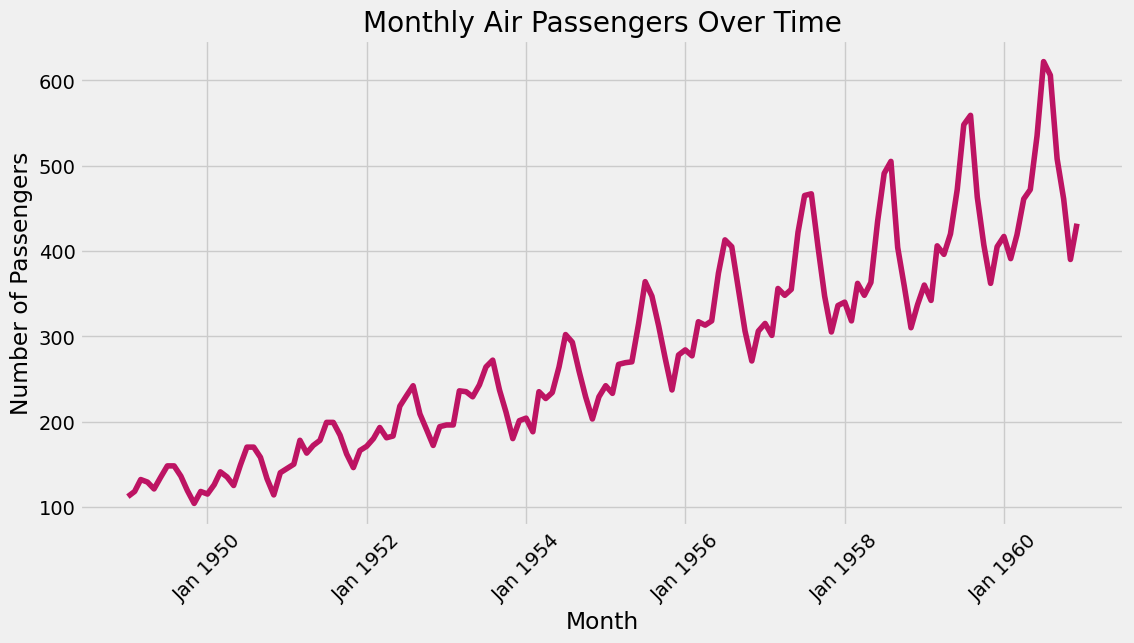

In [11]:
# Plotting the time series data
plt.figure(figsize=(12, 6))  # Create a figure with a specified size (12x6 inches)

# Plot the 'data' DataFrame (i.e., time series data) with a label for the legend and a specific line color
plt.plot(data, label='Monthly Passengers', color='#bd1463')  # Plot the time series of monthly passengers, with a pink color

# Set the title of the plot
plt.title('Monthly Air Passengers Over Time')  # Add a title to the plot

# Set the label for the x-axis
plt.xlabel('Month')  # Label for the x-axis (time period)

# Set the label for the y-axis
plt.ylabel('Number of Passengers')  # Label for the y-axis (number of passengers)

# Customize x-axis date formatting to show month and year (e.g., Jan 1949)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Use mdates.DateFormatter to format the dates on the x-axis

# Rotate the x-axis labels for better visibility (45 degrees)
plt.xticks(rotation=45)  # Rotate the x-axis tick labels to avoid overlap and improve readability

# Display the plot with all customizations
plt.show()  # Show the plot with the defined labels, title, and x-axis formatting

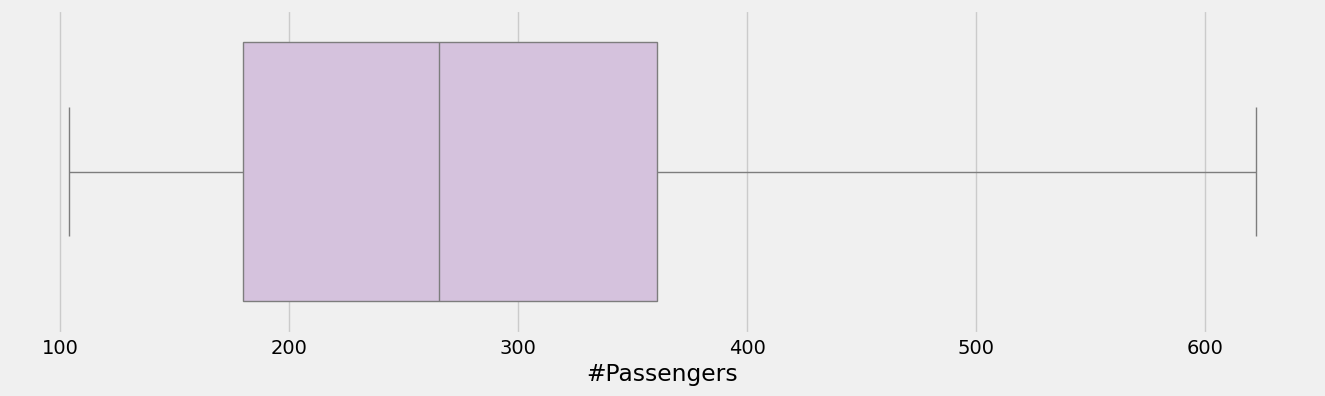

In [12]:
# Create a boxplot for the 'Passengers' column to visualize its distribution
plt.figure(figsize = (15, 4))  # Create a figure with size 15x4 inches (wider to accommodate the boxplot)

# Use seaborn's boxplot function to plot the 'Passengers' data
sns.boxplot(x=data['#Passengers'], color='#D7BDE2')  # Boxplot of 'Passengers' with a custom lavender color (#D7BDE2)

# Display the plot
plt.show()  # Show the plot to visualize the distribution of the passenger numbers

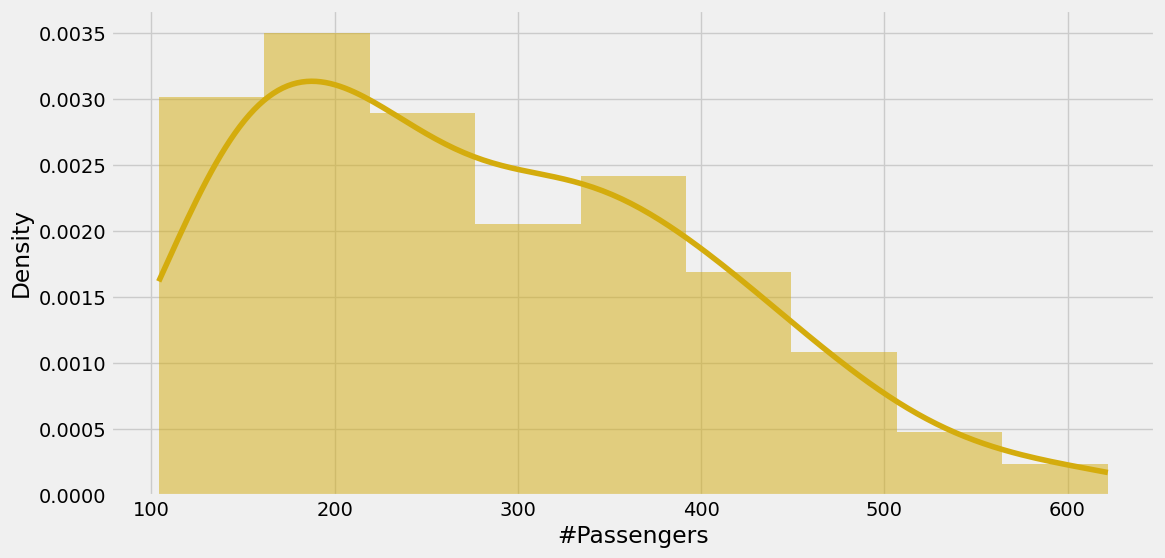

In [13]:
# Create a histogram with kernel density estimate (KDE) to visualize the distribution of 'Passengers'
plt.figure(figsize=(12, 6))  # Create a figure with size 12x6 inches (for better visibility)

# Use seaborn's histplot to plot the distribution of 'Passengers'
sns.histplot(data['#Passengers'],
             color='#D4AC0D',  # Set color of the histogram bars to a golden shade (#D4AC0D)
             label='100% Equities',  # Label for the histogram (if used in legend)
             kde=True,  # Add a Kernel Density Estimate (KDE) curve on top of the histogram
             stat='density',  # Normalize the histogram such that the area under the curve is 1 (density)
             linewidth=0)  # Remove the border line around the histogram bars

# Display the plot
plt.show()  # Show the plot to visualize the distribution of the 'Passengers' data with KDE

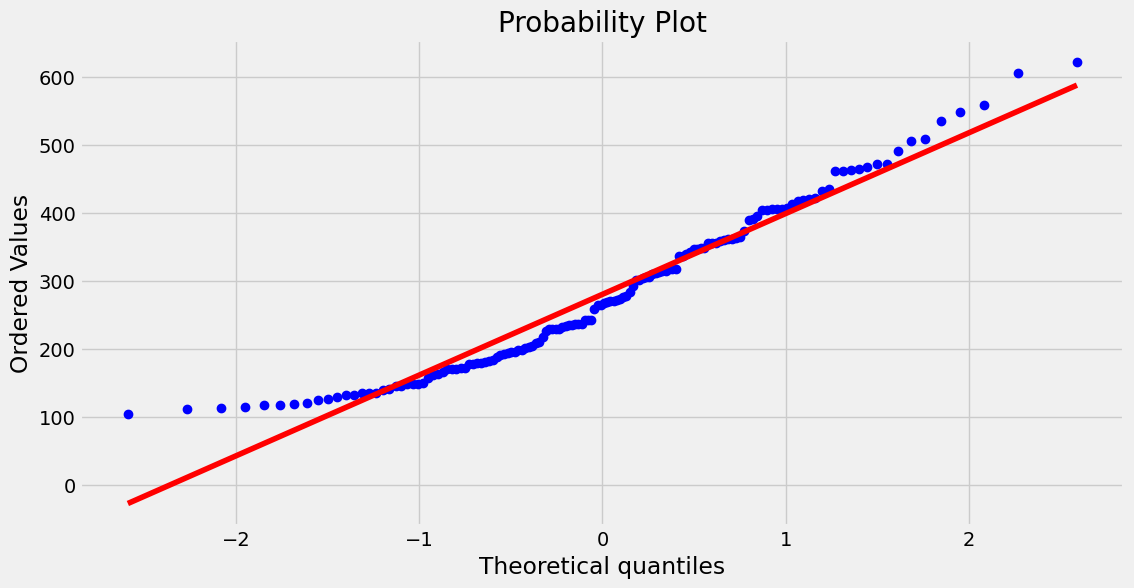

In [14]:
# Generate a Q-Q plot to assess the normality of the 'Passengers' data
plt.figure(figsize=(12, 6))  # Create a figure with size 12x6 inches for better visibility

# Use scipy's stats.probplot to create a Q-Q plot, which compares the data distribution to a normal distribution
stats.probplot(data['#Passengers'],
               plot=pylab)  # 'plot=pylab' will plot the Q-Q plot using pylab, a Matplotlib-like interface

# Display the plot
plt.show()  # Show the Q-Q plot to visualize how well the data fits a normal distribution

In [15]:
# Shapiro-Wilk Test
def shapiro_test(data):
    """
    Perform the Shapiro-Wilk test for normality.
    This test is used to check if the data follows a normal distribution.
    """
    # Perform the Shapiro-Wilk test, which returns the test statistic and p-value
    stat, p_value = stats.shapiro(data)

    # Output the results of the test
    print("Shapiro-Wilk Test:")
    print(f"Statistic: {stat}")  # Test statistic value
    print(f"P-value: {p_value}")  # P-value of the test

    # Check if the p-value is greater than 0.05, which means we fail to reject the null hypothesis (H₀)
    if p_value > 0.05:
        print("Result: The data looks normal (fail to reject H₀)\n")  # Data is normal
    else:
        print("Result: The data does not look normal (reject H₀)\n")  # Data is not normal


# Anderson-Darling Test
def anderson_test(data):
    """
    Perform the Anderson-Darling test for normality.
    This test is another method to assess whether data follows a normal distribution.
    """
    # Perform the Anderson-Darling test, specifying that the distribution is normal
    result = stats.anderson(data, dist='norm')

    # Output the results of the test
    print("Anderson-Darling Test:")
    print(f"Statistic: {result.statistic}")  # Test statistic
    print(f"Critical Values: {result.critical_values}")  # Critical values for different significance levels
    print(f"Significance Levels: {result.significance_level}")  # Corresponding significance levels

    # Compare the test statistic against the critical value at the 5% significance level
    if result.statistic < result.critical_values[2]:  # The critical value for 5% significance is at index 2
        print("Result: The data looks normal (fail to reject H₀)\n")  # Data is normal
    else:
        print("Result: The data does not look normal (reject H₀)\n")  # Data is not normal


# Kolmogorov-Smirnov Test
def ks_test(data):
    """
    Perform the Kolmogorov-Smirnov test for normality.
    This test compares the empirical distribution function of the data with the cumulative distribution function of a normal distribution.
    """
    # Perform the Kolmogorov-Smirnov test against a normal distribution
    stat, p_value = stats.kstest(data, 'norm')

    # Output the results of the test
    print("Kolmogorov-Smirnov Test:")
    print(f"Statistic: {stat}")  # Test statistic
    print(f"P-value: {p_value}")  # P-value

    # Check if the p-value is greater than 0.05, which means we fail to reject the null hypothesis (H₀)
    if p_value > 0.05:
        print("Result: The data looks normal (fail to reject H₀)\n")  # Data is normal
    else:
        print("Result: The data does not look normal (reject H₀)\n")  # Data is not normal


# Combine all three normality tests
def normality_tests(data):
    """
    Run all three normality tests: Shapiro-Wilk, Anderson-Darling, and Kolmogorov-Smirnov.
    """
    # Print a message indicating the start of the normality testing process
    print("Running Normality Tests...\n")

    # Run each of the three tests
    shapiro_test(data)  # Run Shapiro-Wilk test
    anderson_test(data)  # Run Anderson-Darling test
    ks_test(data)  # Run Kolmogorov-Smirnov test


# Call the normality_tests function with the data column '#Passengers' to run all tests
# Replace 'data['#Passengers']' with your actual dataset column
normality_tests(data['#Passengers'])

Running Normality Tests...

Shapiro-Wilk Test:
Statistic: 0.9519577090493235
P-value: 6.832415574230719e-05
Result: The data does not look normal (reject H₀)

Anderson-Darling Test:
Statistic: 1.818533152167305
Critical Values: [0.561 0.639 0.767 0.894 1.064]
Significance Levels: [15.  10.   5.   2.5  1. ]
Result: The data does not look normal (reject H₀)

Kolmogorov-Smirnov Test:
Statistic: 1.0
P-value: 0.0
Result: The data does not look normal (reject H₀)



# <a name='Decomposition'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
4. Decomposition</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

There are 4 components of Time Series:

a) Trend: Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.

b) Seasonality: seasonal variances. Eq: Ice cream sales increases in Summer only

c) Noise or Irregularity: Spikes & troughs at random intervals

d) Cyclicity: behavior that repeats itself after large interval of time, like months, years etc.

--------------------------------------------------------------------------------------------------------------------------
                                                              Additive
-------------------------------------------------------------------------------------------------------------------------- 



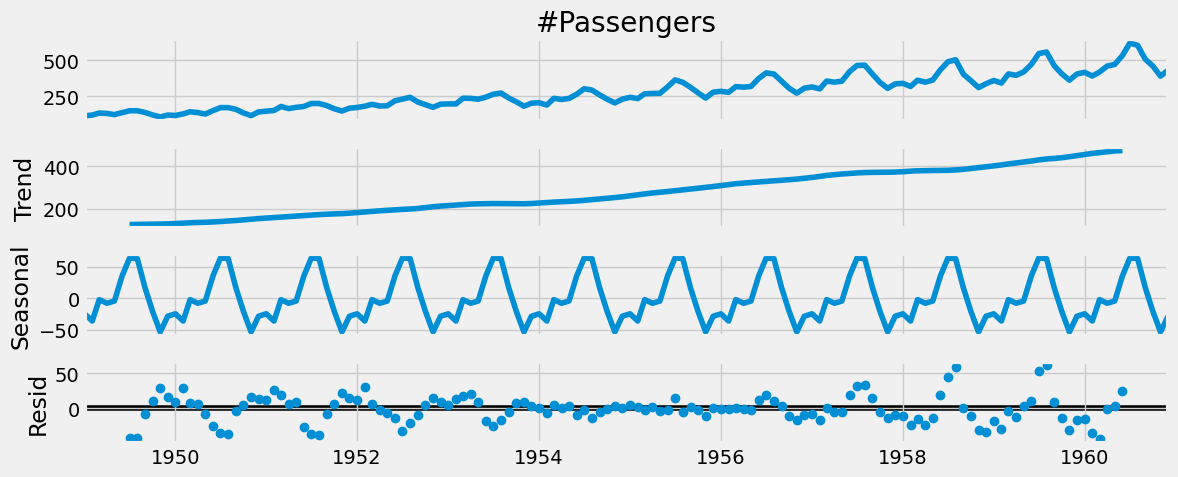

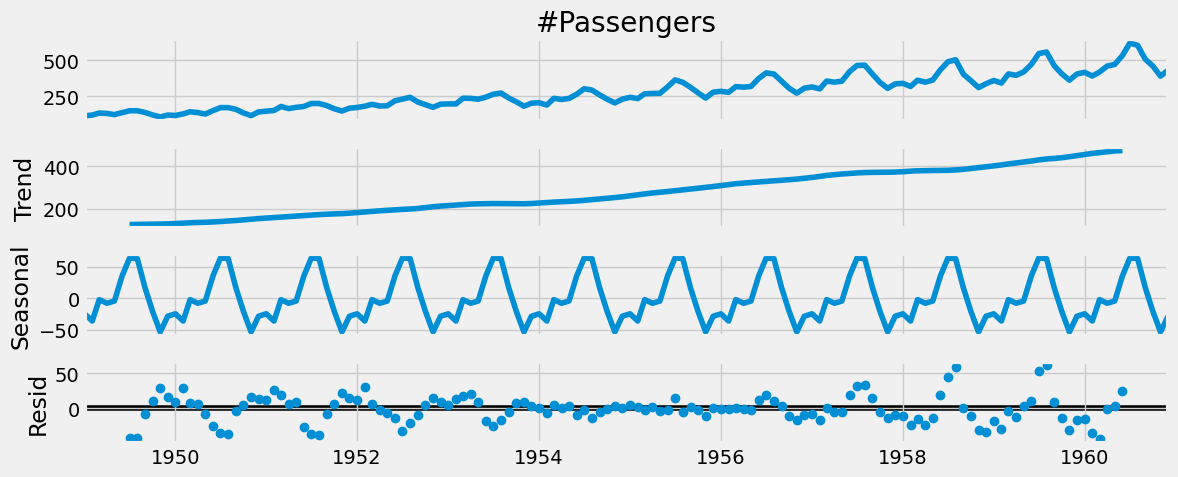

In [16]:
# Set the default figure size for the plots
plt.rcParams['figure.figsize'] = (12, 5)

# Print a header with dashes and a centered label 'Additive'
# The '-' symbol is used to create a separator line, and ' ' is used for centering the word 'Additive'
print('-' * 122)  # Print a line of dashes (122 dashes long)
print(' ' * 61, 'Additive')  # Print 'Additive' in the center
print('-' * 122, '\n')  # Print another line of dashes and add a newline for separation

# Perform the seasonal decomposition using an additive model
# The 'seasonal_decompose' function decomposes a time series into its components: trend, seasonal, and residuals.
# In this case, we are using the 'additive' model, which assumes that the components add together (i.e., Time series = Trend + Seasonality + Residuals)
# This function automatically plots the decomposition result, which includes the trend, seasonal, and residual components of the time series
sm.tsa.seasonal_decompose(data['#Passengers'], model='additive').plot()

--------------------------------------------------------------------------------------------------------------------------
                                                              Multiplicative
-------------------------------------------------------------------------------------------------------------------------- 



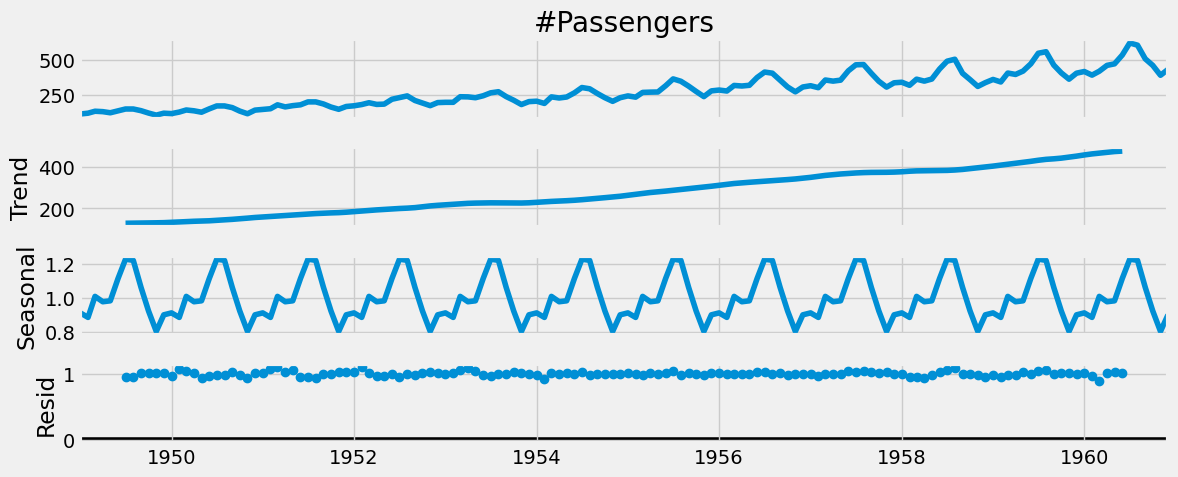

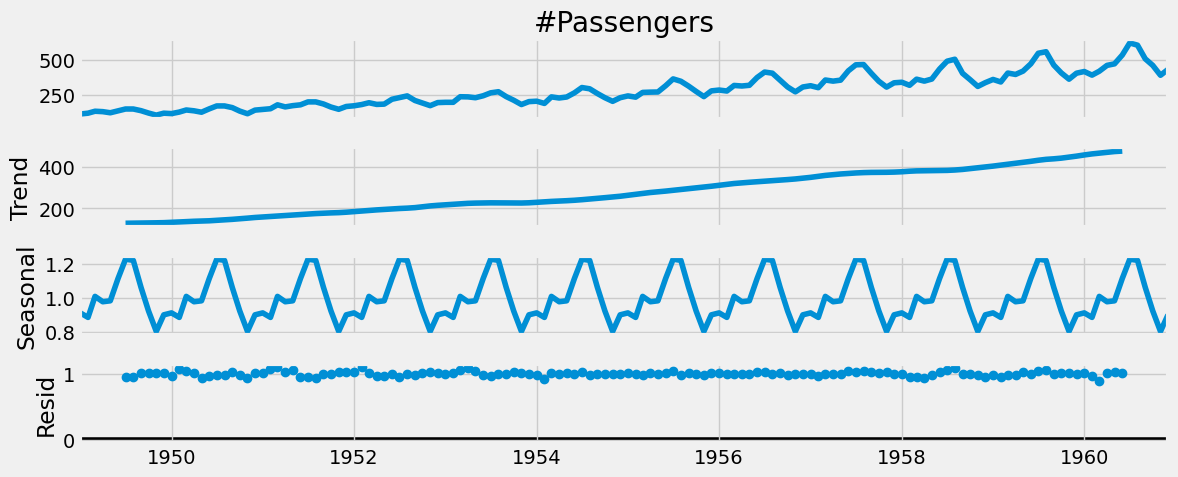

In [17]:
# Set the default figure size for the plots
plt.rcParams['figure.figsize'] = (12, 5)

# Print a header with dashes and a centered label 'Multiplicative'
# The '-' symbol is used to create a separator line, and ' ' is used for centering the word 'Multiplicative'
print('-' * 122)  # Print a line of dashes (122 dashes long)
print(' ' * 61, 'Multiplicative')  # Print 'Multiplicative' in the center
print('-' * 122, '\n')  # Print another line of dashes and add a newline for separation

# Perform the seasonal decomposition using a multiplicative model
# The 'seasonal_decompose' function decomposes a time series into its components: trend, seasonal, and residuals.
# In this case, we are using the 'multiplicative' model, which assumes that the components multiply together (i.e., Time series = Trend * Seasonality * Residuals)
# This function automatically plots the decomposition result, which includes the trend, seasonal, and residual components of the time series
sm.tsa.seasonal_decompose(data['#Passengers'], model='multiplicative').plot()

In [18]:
# Additive model decomposition
decomposition_additive = sm.tsa.seasonal_decompose(data, model='additive', period=12)
# The 'period=12' argument specifies that the seasonality is expected to repeat every 12 periods (e.g., monthly data with yearly seasonality).
# The model assumes the time series is the sum of trend, seasonal, and residual components.

# Log-likelihood for additive model
log_likelihood_additive = decomposition_additive.resid.dropna().sum()
# The 'decomposition_additive.resid' gives the residuals of the additive decomposition, which represent the noise after removing the trend and seasonality.
# 'dropna()' removes any missing values in the residuals, and '.sum()' calculates the sum of the residuals.

# Multiplicative model decomposition
decomposition_multiplicative = sm.tsa.seasonal_decompose(data, model='multiplicative', period=12)
# Similarly, the multiplicative model assumes the time series is the product of trend, seasonal, and residual components.

# Log-likelihood for multiplicative model
log_likelihood_multiplicative = decomposition_multiplicative.resid.dropna().sum()
# Same as the additive model, but for the multiplicative decomposition.

# Calculate AIC (Akaike Information Criterion) for both models (assuming normal residuals and simple models)
n = len(data)  # Number of observations in the dataset (total number of data points).
k = 2  # Number of parameters (in this case, we assume two components: trend and seasonality).

# Calculate AIC for both models (using log-likelihood approximation)
# AIC is a measure of the relative quality of a statistical model for a given dataset. Lower AIC values indicate a better fit.
# The formula for AIC is: AIC = 2k - 2 * log(L), where k is the number of parameters and log(L) is the log-likelihood.
AIC_additive = 2 * k - 2 * log_likelihood_additive
AIC_multiplicative = 2 * k - 2 * log_likelihood_multiplicative

# Print AIC for both models
print(f"AIC (Additive Model): {AIC_additive}")
print(f"AIC (Multiplicative Model): {AIC_multiplicative}")

AIC (Additive Model): 202.33333333332882
AIC (Multiplicative Model): -259.5342137849723


**Interpretation of AIC Values:**
- **AIC** is a measure of the **relative quality** of statistical models for a given set of data. It penalizes for the number of parameters (complexity of the model) while rewarding a better fit to the data.
- **Lower AIC values** indicate a better model fit. The more negative the AIC, the better the model, considering both goodness-of-fit and model complexity.

 **Conclusion from Your AIC Comparison:**

- **Multiplicative Model (AIC = -259.53)** has a **much lower AIC** than the **Additive Model (AIC = 202.33)**.
- This suggests that the **multiplicative model** is a better fit for our data, as it has a more favorable AIC score.

**Why This Happens:**

- **Multiplicative models** are often better when seasonal variations grow in magnitude as the level of the series increases (i.e., the seasonal fluctuations are proportional to the level of the data).
- In our case, the multiplicative model seems to capture the seasonality and trend relationship more effectively, and the lower AIC suggests that it accounts for the data's structure with a better balance of fit and model complexity.

# <a name='Data_Stationarization'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
5. Data Stationarization</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

**What is Stationarity?**

Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,

a) It should have constant mean.

b) It should have constant variance or standard deviation.

c) Auto-covariance should not depend on time.

Trend & Seasonality are two reasons why a Time Series is not stationary & hence need to be corrected.

**Why does Time Series(TS) need to be stationary?**

It is because of the following reasons:

a) If a TS has a particular behavior over a time interval, then there's a high probability that over a different interval, it will have same behavior, provided TS is stationary. This helps in forecasting accurately.

b) Theories & Mathematical formulas ae more mature & easier to apply for as TS which is stationary.

**Tests to check if a series is stationary or not**

There are 2 ways to check for Stationarity of a TS:

a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.

b) ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a TS is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.

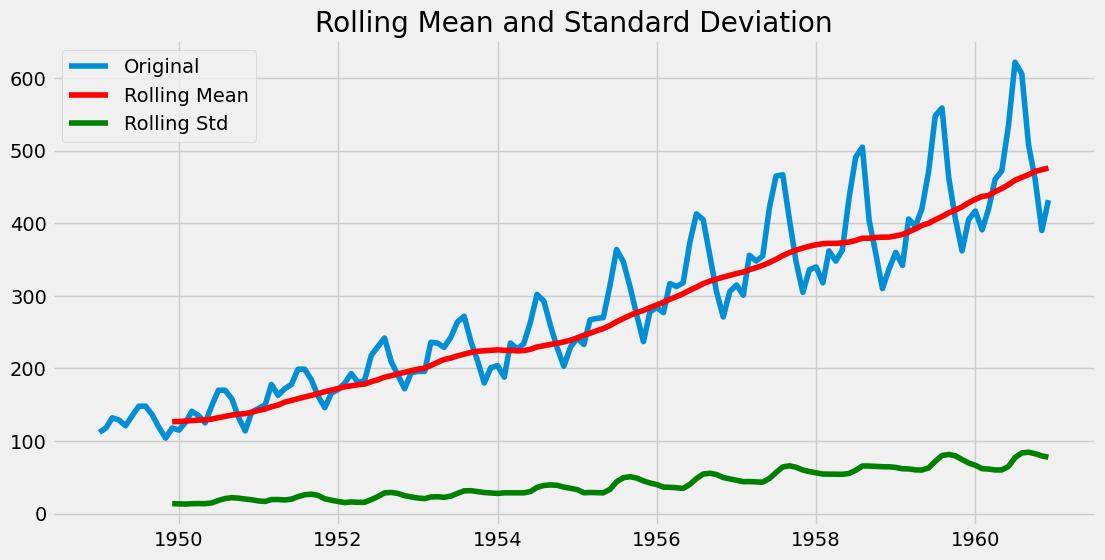

In [19]:
# Rolling mean and standard deviation
rolling_mean = data.rolling(window=12).mean()  # Calculate the rolling mean with a window size of 12 (e.g., 12 months).
rolling_std = data.rolling(window=12).std()  # Calculate the rolling standard deviation with a window size of 12.

# Plot rolling statistics
plt.figure(figsize=(12, 6))  # Set the figure size for the plot.
plt.plot(data, label='Original')  # Plot the original time series data.
plt.plot(rolling_mean, label='Rolling Mean', color='red')  # Plot the rolling mean in red.
plt.plot(rolling_std, label='Rolling Std', color='green')  # Plot the rolling standard deviation in green.
plt.title('Rolling Mean and Standard Deviation')  # Set the title of the plot.
plt.legend()  # Display the legend to label the lines.
plt.show()  # Display the plot.

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the **Augmented Dickey-Fuller (ADF)** test.

In [20]:
# Augmented Dickey-Fuller (ADF) test function
def ADF(data):
    # Perform the Augmented Dickey-Fuller test
    result = adfuller(data)  # 'adfuller' returns multiple outputs: test statistic, p-value, number of lags used, and critical values.

    # Print ADF test results
    print(f'ADF Statistic: {result[0]}')  # Test statistic. If negative and large enough, it suggests stationarity.
    print(f'n_lags: {result[2]}')  # Number of lags used in the test.
    print(f'p-value: {result[1]:.20f}')  # p-value of the test. If less than 0.05, we reject the null hypothesis.

    # Print Critical Values
    print('Critical Values:')  # Critical values for different significance levels (1%, 5%, and 10%).
    for key, value in result[4].items():
        print(f'{key}: {value}')  # Print the critical values at different levels (1%, 5%, and 10%).

    # Interpretation of p-value
    if result[1] < 0.05:  # If the p-value is less than 0.05, the series is stationary (reject null hypothesis).
        print("\nConclusion: The series is stationary (reject the null hypothesis).")
    else:  # If the p-value is greater than 0.05, the series is not stationary (fail to reject null hypothesis).
        print("\nConclusion: The series is not stationary (fail to reject the null hypothesis).")

# Perform ADF test on the '#Passengers' column of the dataset
ADF(data['#Passengers'])  # Run the ADF test on the 'Passengers' column.

ADF Statistic: 0.8153688792060498
n_lags: 13
p-value: 0.99188024343764102930
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598

Conclusion: The series is not stationary (fail to reject the null hypothesis).


Based-on adfuller:
p-value = 0.99 (p-value > 0.05) --> H0 Accepted --> The data is non-stationary

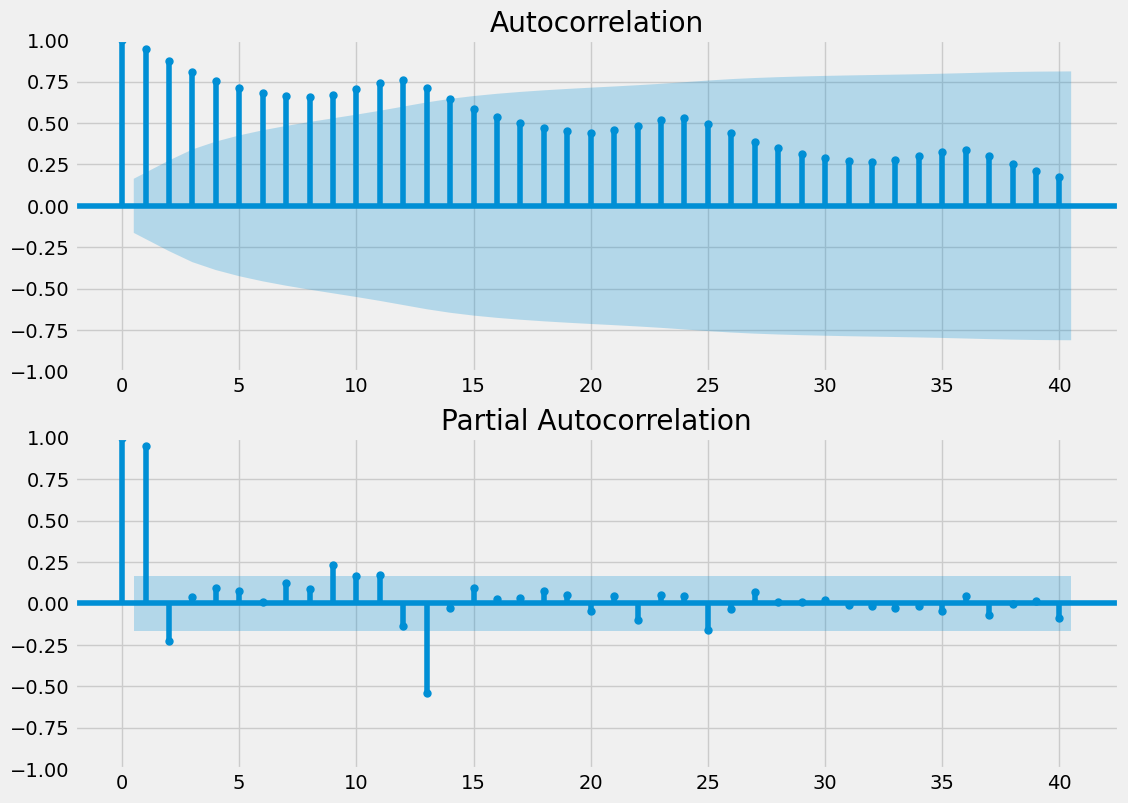

In [21]:
# ACF and PACF function to plot both Autocorrelation and Partial Autocorrelation
def ACF_and_PACF(data):
    # Create a figure with a specific size (12x9 inches)
    fig = plt.figure(figsize=(12,9))

    # Add subplot for ACF (Autocorrelation Function)
    ax1 = fig.add_subplot(211)  # The '211' means 2 rows, 1 column, and 1st subplot.
    fig = plot_acf(data, lags=40, ax=ax1)  # Plot the ACF with 40 lags (number of time lags to display).

    # Add subplot for PACF (Partial Autocorrelation Function)
    ax2 = fig.add_subplot(212)  # The '212' means 2 rows, 1 column, and 2nd subplot.
    fig = plot_pacf(data, lags=40, ax=ax2)  # Plot the PACF with 40 lags (number of time lags to display).

# Call the ACF_and_PACF function for the '#Passengers' column in the dataset
ACF_and_PACF(data['#Passengers'])

**Description of the `ACF_and_PACF` Function:**

The function `ACF_and_PACF(data)` is designed to generate two plots for time series analysis: the **Autocorrelation Function (ACF)** and the **Partial Autocorrelation Function (PACF)**. These plots are commonly used in time series modeling, such as ARIMA, to help identify the AR (Autoregressive) and MA (Moving Average) components of the model.

- **ACF (Autocorrelation Function)**: This plot shows the correlation between the time series and its lagged values. It helps identify the presence of autocorrelation at various lags, which can indicate the need for an **MA component** in models like ARIMA.
  
- **PACF (Partial Autocorrelation Function)**: This plot shows the correlation between the time series and its lagged values after controlling for the correlations at shorter lags. It helps identify the **AR component** of a time series model.

Interpreting the **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** plots is crucial for building and tuning time series models such as ARIMA. These plots help identify the underlying structure of your time series, particularly for determining the **AR (Autoregressive)** and **MA (Moving Average)** components. Here's how you can interpret these plots:

---

**1. Autocorrelation Function (ACF) Plot:**
The ACF plot shows the correlation between a time series and its own lagged values at different lags.

**Key Features to Look for in the ACF Plot:**
- **Significant spikes**: Look for spikes (bars) that extend beyond the **confidence interval** (usually shown as dashed lines). These indicate significant autocorrelations at the corresponding lag.
- **Decay pattern**: The way the correlation decays as lags increase can suggest the type of model:
  - **Slow decay**: If the ACF plot shows a slow decay (gradual decline in correlation), it suggests that the series may require **differencing** to become stationary. It could indicate the presence of a **trend** in the data (non-stationarity).
  - **Cut-off**: If the ACF cuts off sharply after a certain lag, this indicates that a **Moving Average (MA) process** might be a good fit for the model. Specifically, the point at which the ACF cuts off suggests the **order of the MA model** (i.e., `q` in ARIMA(p,d,q)).
  - **Sine-wave-like pattern**: If the ACF shows a repetitive pattern, it may suggest **seasonality** in the data, and you might need to incorporate seasonal components (like SARIMA).

**Example Interpretation of ACF Plot:**
- **Significant correlation at lag 1 and then decay to zero**: This suggests that a **Moving Average (MA) model** of order 1 (MA(1)) could be appropriate. You may not need higher-order MA terms if the correlation at higher lags falls inside the confidence interval.
- **Slow decay**: If the ACF decays slowly and never reaches zero, this indicates that the series likely has a **trend** and is **non-stationary**, meaning that differencing might be required before modeling.

**2. Partial Autocorrelation Function (PACF) Plot:**
The PACF plot shows the partial correlation between the time series and its lagged values, after removing the influence of earlier lags. This is useful for identifying the **AR (Autoregressive)** component of a time series model.

**Key Features to Look for in the PACF Plot:**
- **Significant spikes**: Look for spikes that extend beyond the **confidence interval**. These indicate a direct relationship at the corresponding lag.
- **Cut-off**: The **lag where the PACF cuts off** (where the bars fall within the confidence interval) indicates the **order of the AR process**.
  - **Sharp cut-off after a certain lag**: A sharp cut-off suggests an **Autoregressive (AR) process**. Specifically, the number of significant lags before the cut-off suggests the **order of the AR model** (i.e., `p` in ARIMA(p,d,q)).

**Example Interpretation of PACF Plot:**
- **Significant spike at lag 1 and then cut-off**: This suggests an **AR(1)** model, meaning the best model might involve a **single lag of past values** to predict future values.
- **Significant spikes at several lags**: If the PACF shows significant spikes at multiple lags (e.g., at lags 1, 2, and 3), you might have a higher-order **AR process** (e.g., AR(3)).
- **No significant spikes**: If there are no significant spikes beyond lag 0, it suggests that the data might be better modeled using **only MA terms** or **no AR component**.

**Combined ACF and PACF Analysis:**

- **ACF and PACF for ARIMA Models**:
  - **ARIMA(p, d, q)**:
    - **ACF** helps to identify `q`, the order of the **MA** process.
    - **PACF** helps to identify `p`, the order of the **AR** process.
  - **ARIMA(p, d, q) Model Rules**:
    - **If ACF cuts off sharply and PACF decays slowly**: Likely a **MA model** (q terms).
    - **If PACF cuts off sharply and ACF decays slowly**: Likely an **AR model** (p terms).
    - **If both ACF and PACF decay slowly**: This suggests that differencing is needed (and possibly **seasonal components** if the decay follows a sine wave or repeats in a cyclical pattern).

**Example Scenarios:**
Let’s say you have the following two plots:

**1. ACF shows a sharp cut-off after lag 1, and PACF decays slowly:**
- This suggests an **MA(1)** model, meaning the time series has significant autocorrelation at lag 1, but the correlation at subsequent lags is negligible.

**2. PACF shows a sharp cut-off after lag 2, and ACF decays slowly:**
- This suggests an **AR(2)** model, meaning that the time series has a significant autoregressive relationship with its first two lags.

**3. ACF and PACF both show a slow decay:**
- This indicates a **non-stationary** series that likely requires differencing (i.e., to make the series stationary) before applying ARIMA.

**Summary of What to Look for in ACF and PACF:**

| **Pattern**                         | **Model Implication**                         |
|-------------------------------------|-----------------------------------------------|
| **ACF cuts off sharply, PACF decays slowly** | Likely a **MA model** (Moving Average). Check the ACF for the number of significant lags (q). |
| **PACF cuts off sharply, ACF decays slowly** | Likely an **AR model** (Autoregressive). Check the PACF for the number of significant lags (p). |
| **Both ACF and PACF decay slowly** | **Differencing** is likely required to make the series stationary. |
| **Sine wave pattern in ACF and PACF** | **Seasonality** present, suggesting a **seasonal model** (e.g., SARIMA). |

**Non-stationary Elimination:**

In this time series, we have seasonal components and non-constant variance and mean. To eliminate these non-stationary, we do the following:

1. Elimination of non-constant variance (Heteroscedasticity)

2. Elimination of seasonal components

3. Elimination of non-constant mean (Trend)

#### **1. Elimination of non-constant variance (Heteroscedasticity)**

The Box-Cox transformation is a family of power transformations that are used to stabilize variance and make data more normally distributed. It is particularly useful when the data shows non-constant variance (heteroscedasticity), as it can reduce the effect of large fluctuations and make the series more stationary.

The formula for the Box-Cox transformation is:

$y' = \frac{y^\lambda - 1}{\lambda} \quad \text{for} \quad \lambda \neq 0$

$y' = \log(y) \quad \text{for} \quad \lambda = 0$

Where:
- $( y )$ is the original data (here, the number of passengers).
- $( \lambda )$ is the **Box-Cox parameter** (also called the **lambda** parameter), which determines the power of the transformation. If the value of fitted_lambda is close to 0, the transformation is close to a logarithmic transformation. The process of determining this optimal $\lambda$ is typically done through maximum likelihood estimation (MLE).
  - If $( \lambda = 1 )$, the data remains unchanged.
  - If $( \lambda = 0 )$, the transformation becomes a **log transformation**.
  - If $( \lambda > 1 )$, the transformation becomes a **power transformation**.
  - If $( \lambda < 1 )$, the transformation **compresses** the values.

The goal of the transformation is to make the variance of the data more constant (homoscedastic), which is one of the key assumptions for time series models like ARIMA.

--------------------------------------------------
      fitted_lambda is:  0.14802254856840585
-------------------------------------------------- 



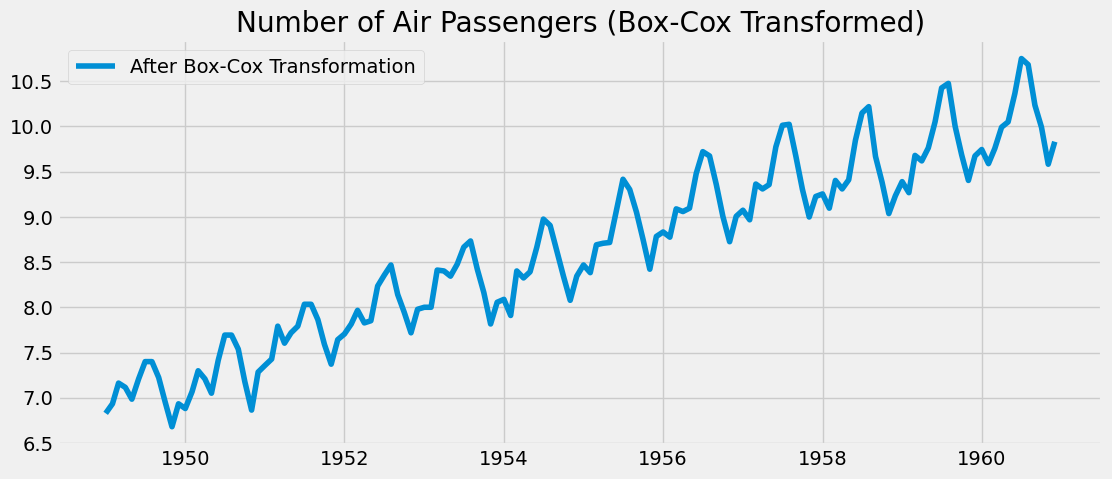

In [22]:
# Perform Box-Cox Transformation
fitted_data, fitted_lambda = stats.boxcox(data['#Passengers'])  # Apply Box-Cox transformation

# Print the lambda value used for the transformation
print('-'*50)
print(' '*5,'fitted_lambda is: ', fitted_lambda)  # Output the fitted lambda value
print('-'*50,'\n')

# Create a new Series for the transformed data with the same index as the original data
data_boxcox = pd.Series(boxcox(data['#Passengers'], fitted_lambda), index=data.index)

# Plot the transformed data (after Box-Cox transformation)
plt.plot(data_boxcox, label='After Box-Cox Transformation')
plt.legend()  # Show legend
plt.title('Number of Air Passengers (Box-Cox Transformed)')  # Title of the plot
plt.show()  # Display the plot

In [23]:
ADF(data_boxcox)

ADF Statistic: -1.3260711769488467
n_lags: 13
p-value: 0.61716193579693268134
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598

Conclusion: The series is not stationary (fail to reject the null hypothesis).


#### **2. Elimination seasonal components with differencing**

In this step, we apply differencing to the Box-Cox transformed time series data to remove seasonality. Differencing is a common technique used in time series analysis to remove trends and seasonality, making the data more stationary.

Seasonal differencing is applied by subtracting the value of the time series from the value 12 months earlier. Specifically, it uses `.shift(periods=12)` to shift the time series by 12 periods (12 months for monthly data) and subtracts the shifted data from the original data.

$y'_t=y_t-y_{t-12}$

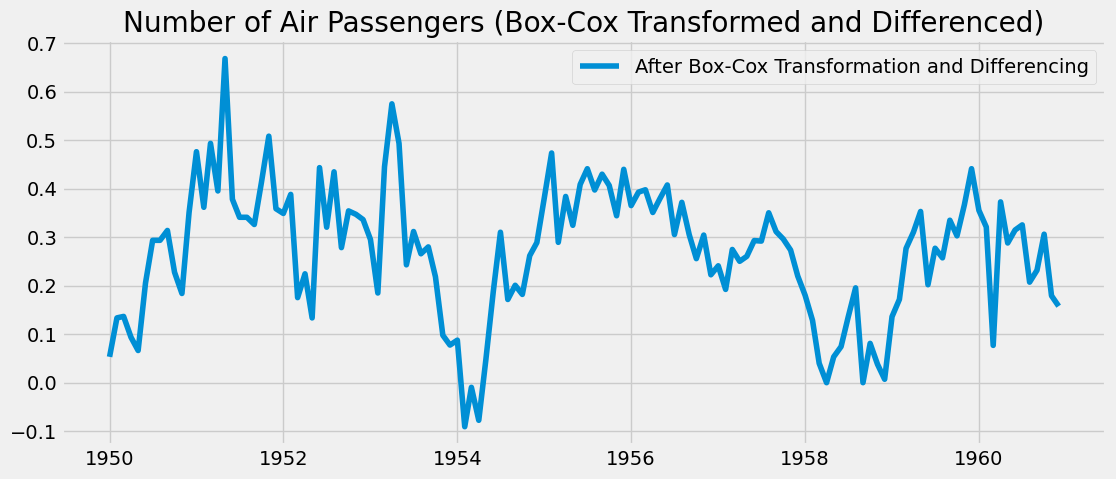

In [24]:
# Apply differencing to the Box-Cox transformed data (12 periods lag)
data_boxcox_diff_12 = pd.Series(data_boxcox - data_boxcox.shift(periods=12), index=data.index)

# Drop missing values after differencing
data_boxcox_diff_12.dropna(inplace=True)

# Plot the differenced data
plt.plot(data_boxcox_diff_12, label='After Box-Cox Transformation and Differencing')  # Plot transformed and differenced data
plt.legend()  # Show legend
plt.title('Number of Air Passengers (Box-Cox Transformed and Differenced)')  # Title of the plot
plt.show()  # Display the plot

In [25]:
ADF(data_boxcox_diff_12)

ADF Statistic: -2.842113376277465
n_lags: 12
p-value: 0.05250540941517865823
Critical Values:
1%: -3.4865346059036564
5%: -2.8861509858476264
10%: -2.579896092790057

Conclusion: The series is not stationary (fail to reject the null hypothesis).


#### **3. Elimination non-constant mean with differencing (Trend)**

In this step, we use second-order differencing to remove the non-constant mean (i.e., the trend) from the time series data. This process helps in making the data stationary by eliminating any trend present in the series.

Now, second-order differencing is applied to remove the trend from the data.
The first-order differenced data (data_boxcox_diff_12) is differenced again by subtracting the previous value (with `.shift()`), which removes the trend component.

$y''_t=y'_t-y'_{t-1}$

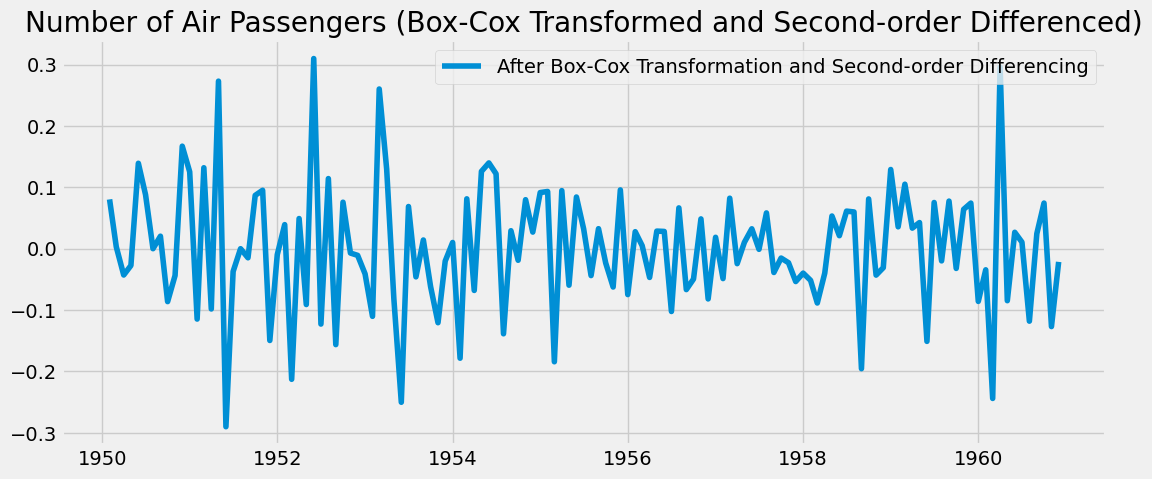

In [26]:
# Apply second-order differencing to the previously differenced Box-Cox transformed data
data_boxcox_second_order_diff = pd.Series(data_boxcox_diff_12 - data_boxcox_diff_12.shift(), index=data.index)

# Drop missing values after second-order differencing
data_boxcox_second_order_diff.dropna(inplace=True)

# Plot the second-order differenced data
plt.plot(data_boxcox_second_order_diff, label='After Box-Cox Transformation and Second-order Differencing')  # Plot second-order differenced data
plt.legend(loc='upper right')  # Show legend in the upper-right corner
plt.title('Number of Air Passengers (Box-Cox Transformed and Second-order Differenced)')  # Title of the plot
plt.show()  # Display the plot

In [27]:
ADF(data_boxcox_second_order_diff)

ADF Statistic: -4.393872642588999
n_lags: 12
p-value: 0.00030433255958760904
Critical Values:
1%: -3.4870216863700767
5%: -2.8863625166643136
10%: -2.580009026141913

Conclusion: The series is stationary (reject the null hypothesis).


Based-on adfuller:
p-value < 0.05 --> H0 Reject --> The data is stationary

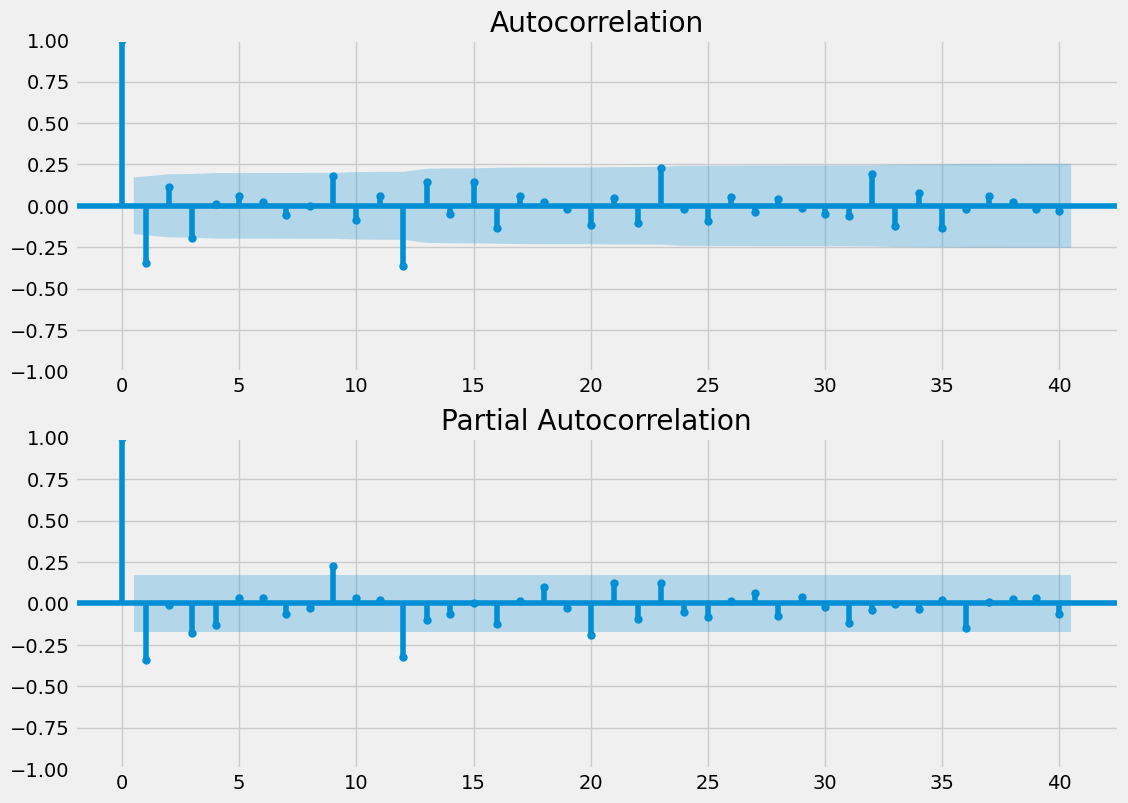

In [28]:
# Call the ACF_and_PACF function for the second-order differenced Box-Cox transformed data
ACF_and_PACF(data_boxcox_second_order_diff)

# <a name='Dataset_Splitting'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
6. Data Splitting</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

This code is splitting the time series data (data_boxcox_second_order_diff) into two parts: a training set and a test set. The training set will be used to build a forecasting model, while the test set is used to evaluate the model's performance on unseen data.

In [29]:
# Calculate the number of training samples (80% of the data length)
num_train = math.floor(len(data['#Passengers']) * 0.8)  # 80% of the total data length

# Split the original data into training and testing sets
train = data[:num_train]  # Training data: First 80% of the original data
test = data[num_train:]   # Testing data: Remaining 20% of the original data

In [30]:
# Split the transformed Box-Cox and differenced data into training and testing sets
train_data = data_boxcox_second_order_diff[:num_train]  # Training data: First 80% of the transformed data
test_data = data_boxcox_second_order_diff[num_train:]   # Testing data: Remaining 20% of the transformed data

In [31]:
# Display the last few rows of the training data (tail of the series)
train_data.tail()

,#Passengers
Month,
1959-04-01,0.033505
1959-05-01,0.042581
1959-06-01,-0.150944
1959-07-01,0.075219
1959-08-01,-0.019876


In [32]:
# Display the first few rows of the testing data (head of the series)
test_data.head()

,#Passengers
Month,
1959-09-01,0.077553
1959-10-01,-0.032159
1959-11-01,0.064099
1959-12-01,0.074289
1960-01-01,-0.085853


# <a name='AR'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
7. Autoregressive Model (AR)</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

What is ARIMA model?

ARIMA(Auto Regressive Integrated Moving Average) is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). It has 3 hyperparameters - P(auto regressive lags),d(order of differentiation),Q(moving avg.) which respectively comes from the AR, I & MA components. The AR part is correlation between prev & current time periods. To smooth out the noise, the MA part is used. The I part binds together the AR & MA parts.

How to find value of P & Q for ARIMA?

A. We need to take help of ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function) plots. ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.

From PACF(at y=0), get P

From ACF(at y=0), get Q

In [33]:
# Define the ARIMA model with p=12 (AR order), d=0 (no differencing), q=0 (MA order)
model_ar = ARIMA(train_data, order=(12, 0, 0))  # (p, d, q) = (12, 0, 0) for an AR(12) model

# Fit the ARIMA model to the training data
model_fit_ar = model_ar.fit()  # This fits the model to the data

# Display the model summary
model_fit_ar.summary()  # Prints out the summary of the fitted ARIMA model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                ARIMA(12, 0, 0)   Log Likelihood                 121.997
Date:                Tue, 03 Dec 2024   AIC                           -215.994
Time:                        12:00:47   BIC                           -177.565
Sample:                    02-01-1950   HQIC                          -200.396
                         - 08-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.005      0.183      0.855      -0.009       0.011
ar.L1         -0.3218      0.084     -3.815      0.000      -0.487      -0.156
ar.L2         -0.0157      0.110     -0.144      0.886      -0.231       0.199
ar.L3         -0.1334      0.107     -1.244      0.214      -0.344       0.077
ar.L4         -0.0969      0.116     -0.834      0.404      -0.324       0.131
ar.L5          0.0099      0.087      0.114      0.909      -0.160       0.180
ar.L6          0.0587      0.094      0.628      0.530      -0.125       0.242
ar.L7         -0.0452      0.107     -0.423      0.672      -0.255       0.164
ar.L8         -0.0028      0.093     -0.030      0.976      -0.186       0.180
ar.L9          0.1305      0.094      1.383      0.167      -0.054       0.315
ar.L10         0.0242      0.099      0.245      0.807      -0.170       0.218
ar.L11        -0.1132      0.096     -1.176      0.240      -0.302       0.076
ar.L12        -0.3798      0.090     -4.210      0.000      -0.557      -0.203
sigma2         0.0069      0.001      6.894      0.000       0.005       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.71   Prob(JB):                         0.51
Heteroskedasticity (H):               0.54   Skew:                             0.26
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# Obtain the fitted values (predicted values on training data) from the ARIMA model
pred_AR_diff = pd.Series(model_fit_ar.fittedvalues, copy=True)

# Calculate the cumulative sum of the differences (for inverse Box-Cox transformation)
pred_AR_diff_cumsum = pred_AR_diff.cumsum()  # This represents the cumulative sum of the differences over time

# Reconstruct the Box-Cox transformed data (which was used for differencing)
# Create a new series for the Box-Cox transformed data
pred_AR_boxcox = pd.Series(data_boxcox, index=data_boxcox.index)

# Add the cumulative sum of the differences to the Box-Cox transformed series
# This operation reverses the differencing step, restoring the series to the original scale (before differencing)
pred_AR_boxcox = pred_AR_boxcox.add(pred_AR_diff_cumsum, fill_value=0)

# Inverse the Box-Cox transformation to get the actual predicted values in the original scale
# The Box-Cox transformation was applied earlier to stabilize variance and make the data stationary
pred_AR = inv_boxcox(pred_AR_boxcox, fitted_lambda)

# Display the first few predicted values
pred_AR.head()  # Returns the first few predicted values of the ARIMA model (in the original scale of data)

,0
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


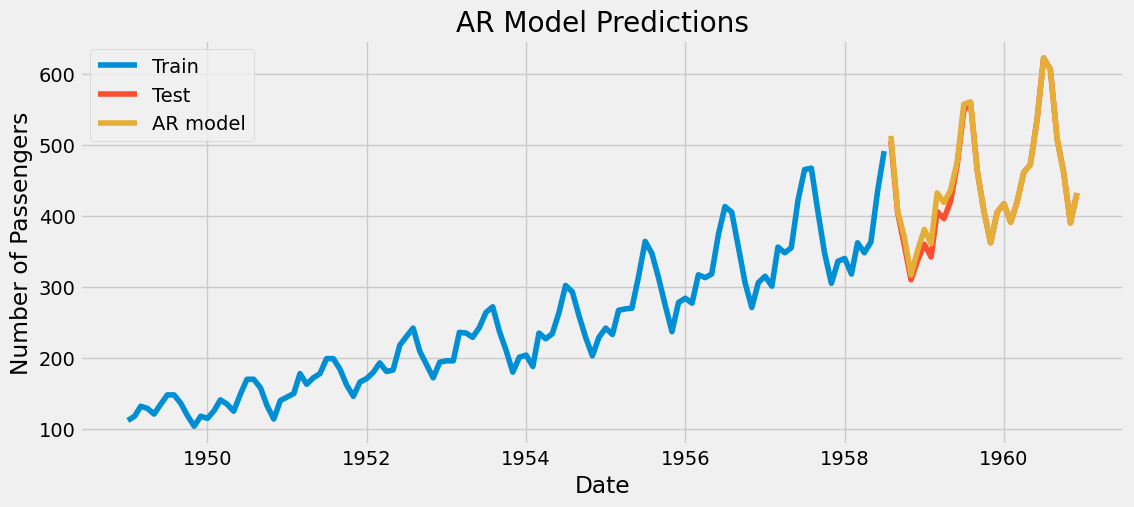

In [35]:
# Plot the original training data ('#Passengers') using the 'Train' label
plt.plot(train['#Passengers'], label='Train')  # Training data for the number of passengers

# Plot the original test data ('#Passengers') using the 'Test' label
plt.plot(test['#Passengers'], label='Test')  # Test data for the number of passengers

# Plot the AR model predictions on the original scale
# Ensure that the AR model predictions are indexed properly to align with the test set
plt.plot(pred_AR[test.index.min():], label='AR model')  # AR model predictions for the test period

# Add legend to differentiate between the different lines in the plot
plt.legend()

# Add title to the plot
plt.title('AR Model Predictions')  # Title indicating this is the AR model

# Label the x-axis as 'Date'
plt.xlabel('Date')  # The x-axis represents time (dates)

# Label the y-axis as 'Number of Passengers'
plt.ylabel('Number of Passengers')  # The y-axis represents the number of passengers

# Display the plot
plt.show()  # Show the plot to visualize the training data, test data, and AR model predictions

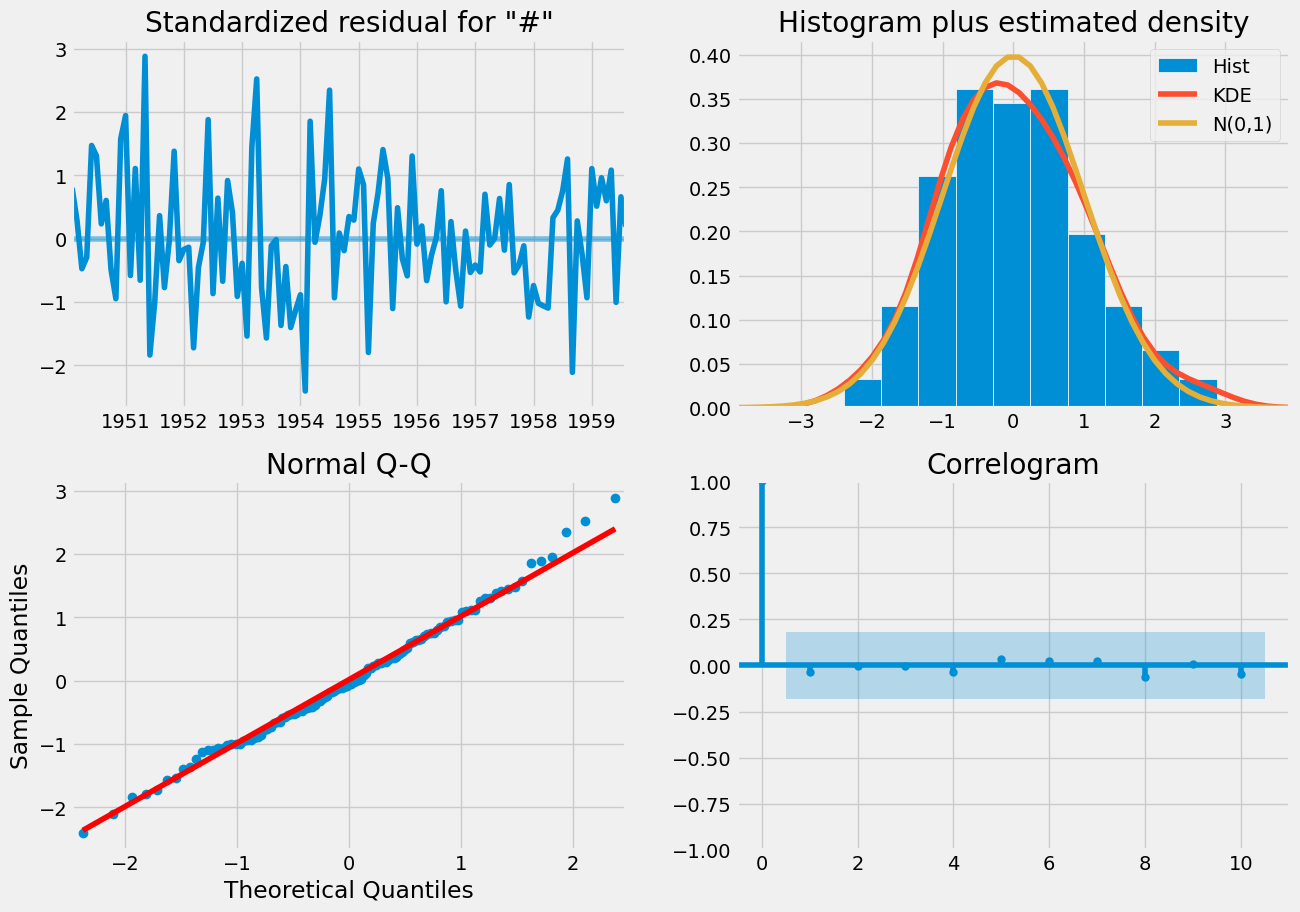

In [36]:
# Generate diagnostic plots for the ARIMA model
x = model_fit_ar.plot_diagnostics(figsize=(14,10))
# `plot_diagnostics` is a function that creates several diagnostic plots to assess the residuals of the ARIMA model
# These plots help to check the model assumptions, including the normality of residuals and autocorrelation.

In [37]:
# Ensure that the prediction corresponds to the test set only
# Extract the portion of `pred_AR` that matches the test set's index
pred_AR_test = pred_AR[test.index]

# Calculate MSE, MAE using the test data and the corresponding predictions
mse_test_AR = mean_squared_error(test, pred_AR_test)
mae_test_AR = mean_absolute_error(data, pred_AR)
print(f'Mean Squared Error (MSE) for Test Set: {mse_test_AR}')
print(f'Mean Absolute Error (MAE) for Test Set: {mae_test_AR}')

Mean Squared Error (MSE) for Test Set: 94.82355907442327
Mean Absolute Error (MAE) for Test Set: 10.578835560606693


# <a name='ARMA'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
8. Autoregressive Moving Average Model (ARMA)</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [38]:
# Fit an ARIMA model with order (6, 0, 6) to the training data
model_arma = ARIMA(train_data, order=(6, 0, 6))
# The order of the ARIMA model is specified as (p, d, q), where:
# p = 6 (Auto-regressive term: number of lag observations in the model)
# d = 0 (Differencing term: no differencing needed as the data is stationary)
# q = 6 (Moving average term: number of lagged forecast errors to include in the model)

# Fit the ARIMA model to the training data
model_fit_arma = model_arma.fit()
# The `.fit()` method fits the ARIMA model to the `train_data`. This step estimates the model parameters.

# Display the summary of the fitted ARIMA model
model_fit_arma.summary()
# This shows the detailed summary of the ARIMA model, including coefficient estimates, standard errors, and model diagnostics
# Useful for evaluating the performance of the model, including the significance of each parameter

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                 ARIMA(6, 0, 6)   Log Likelihood                 121.124
Date:                Tue, 03 Dec 2024   AIC                           -214.248
Time:                        12:00:51   BIC                           -175.819
Sample:                    02-01-1950   HQIC                          -198.649
                         - 08-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.007      0.216      0.829      -0.013       0.016
ar.L1         -0.0625      0.347     -0.180      0.857      -0.743       0.618
ar.L2          0.2014      0.248      0.811      0.417      -0.285       0.688
ar.L3         -0.5898      0.218     -2.712      0.007      -1.016      -0.163
ar.L4          0.3544      0.198      1.791      0.073      -0.034       0.742
ar.L5          0.0172      0.274      0.063      0.950      -0.521       0.555
ar.L6         -0.5117      0.173     -2.961      0.003      -0.850      -0.173
ma.L1         -0.1782      0.351     -0.508      0.612      -0.866       0.509
ma.L2         -0.1075      0.317     -0.340      0.734      -0.728       0.513
ma.L3          0.4417      0.161      2.747      0.006       0.127       0.757
ma.L4         -0.6461      0.296     -2.182      0.029      -1.226      -0.066
ma.L5          0.3681      0.314      1.171      0.242      -0.248       0.984
ma.L6          0.4748      0.274      1.735      0.083      -0.062       1.011
sigma2         0.0068      0.002      3.918      0.000       0.003       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.66   Prob(JB):                         0.73
Heteroskedasticity (H):               0.46   Skew:                             0.16
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
# Generate the fitted values (residuals) from the ARMA model
pred_ARMA_diff = pd.Series(model_fit_arma.fittedvalues, copy=True)
# `fittedvalues` are the predicted values (after fitting the model) based on the ARMA model.
# `copy=True` ensures a copy of the data is created to avoid modifying the original object.

# Compute the cumulative sum of the residuals (fitted values)
pred_ARMA_diff_cumsum = pred_ARMA_diff.cumsum()
# This step reverses the differencing effect. By taking the cumulative sum of the residuals, we add back the differences to get back to the original scale (before differencing).

# Create a new series that will hold the transformed predictions in the Box-Cox space
pred_ARMA_boxcox = pd.Series(data_boxcox, index=data_boxcox.index)
# The `data_boxcox` series is the transformed (Box-Cox) version of the original time series.
# We create a new series `pred_ARMA_boxcox` with the same index as the original series.

# Add the cumulative sum of the fitted values to the Box-Cox transformed data (to reverse the differencing)
pred_ARMA_boxcox = pred_ARMA_boxcox.add(pred_ARMA_diff_cumsum, fill_value=0)
# We add the cumulative sum of the fitted residuals (`pred_ARMA_diff_cumsum`) to the Box-Cox transformed data.
# `fill_value=0` ensures that missing values are filled with zero (in case of any misalignment).

# Transform the predictions back to the original scale by applying the inverse Box-Cox transformation
pred_ARMA = inv_boxcox(pred_ARMA_boxcox, fitted_lambda)
# The `inv_boxcox()` function takes the transformed predictions (`pred_ARMA_boxcox`) and applies the inverse of the Box-Cox transformation to convert them back to the original scale.
# `fitted_lambda` is the lambda value used during the Box-Cox transformation.

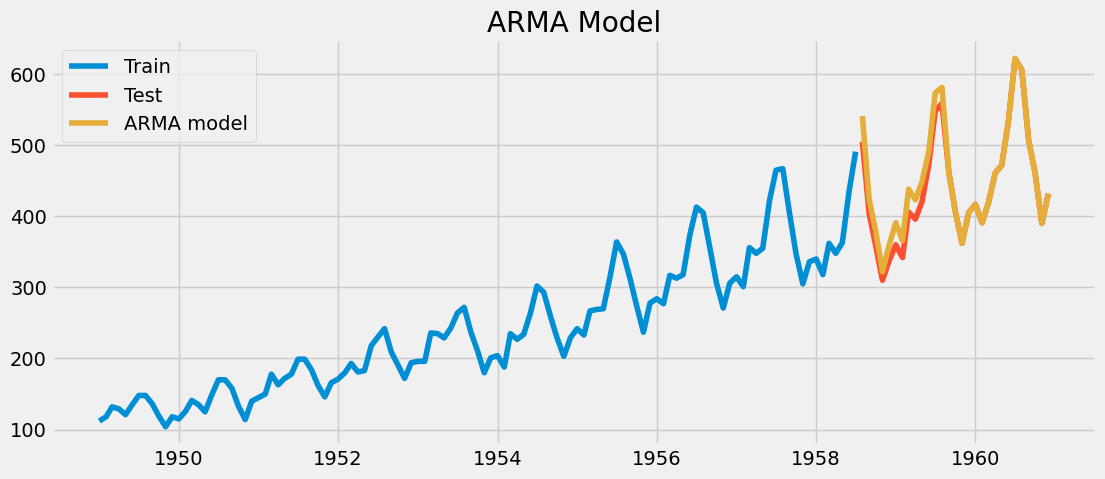

In [40]:
# Plot the training data series
plt.plot(train['#Passengers'], label='Train')  # Plot the training data (historical data) of passengers.
# `train['#Passengers']` represents the actual number of passengers in the training set.

# Plot the test data series
plt.plot(test['#Passengers'], label='Test')  # Plot the test data (future unseen data) of passengers.
# `test['#Passengers']` represents the actual number of passengers in the test set.

# Plot the predictions of the ARMA model
plt.plot(pred_ARMA[test.index.min():], label='ARMA model')
# `pred_ARMA[test.index.min():]` ensures that the ARMA predictions are aligned with the test set.
# `test.index.min()` is used to slice the predictions from the point where the test set starts.

# Add a legend to differentiate between the data series and the model predictions
plt.legend()

# Set the title for the plot
plt.title('ARMA Model')  # Title of the plot indicating it is the ARMA model's predictions.

# Show the plot
plt.show()

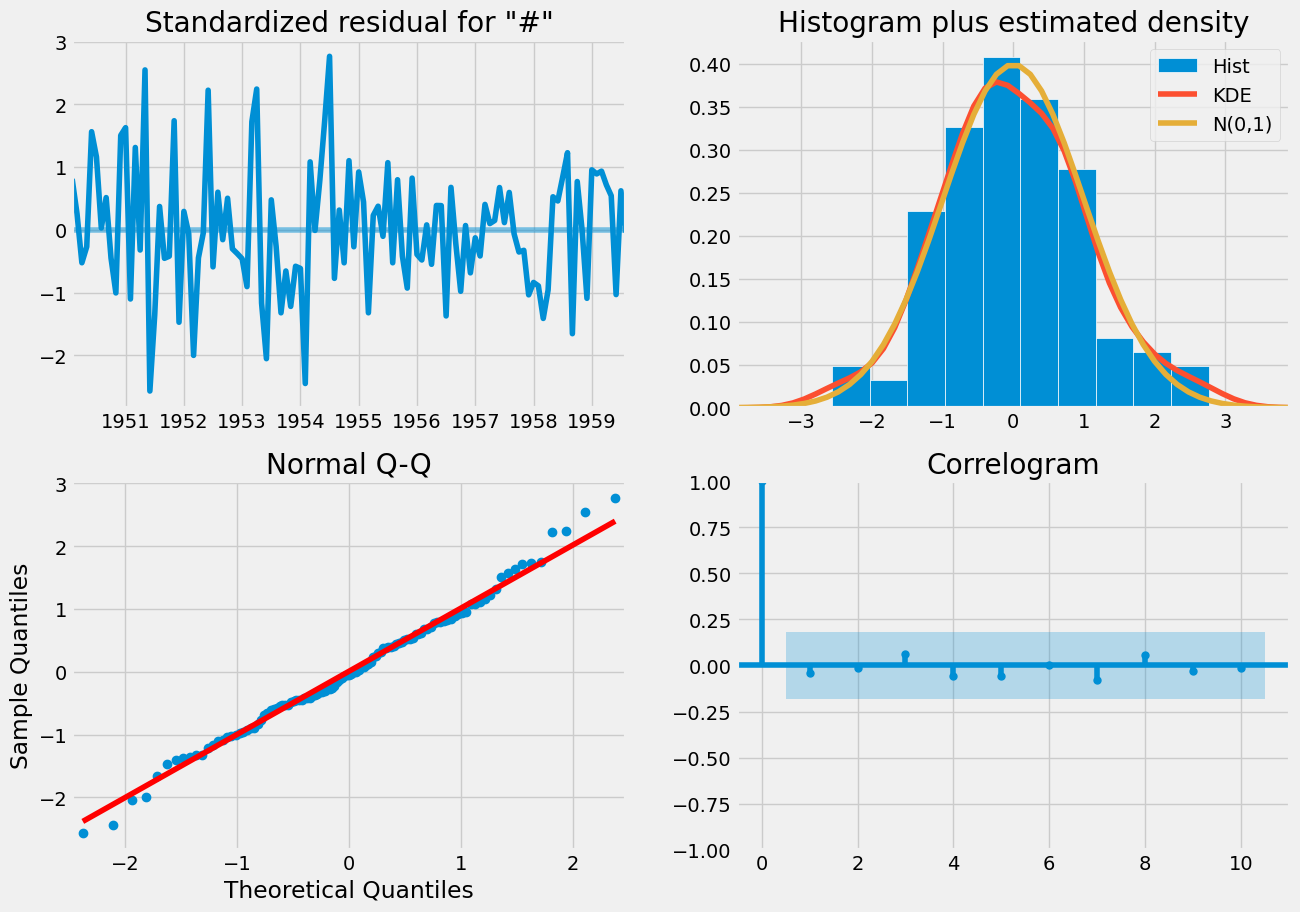

In [41]:
# Generate diagnostic plots for the ARMA model to assess its performance and residuals
x = model_fit_arma.plot_diagnostics(figsize=(14,10))
# `plot_diagnostics` generates a series of diagnostic plots to assess the residuals of the fitted ARMA model:
# 1. **Residuals vs Fitted**: Checks if the residuals exhibit any systematic pattern. Ideally, they should be randomly scattered around zero.
# 2. **QQ-Plot**: Assesses if the residuals are normally distributed by comparing their quantiles to those of a normal distribution.
# 3. **Histogram of Residuals**: Displays the distribution of the residuals to check for any skewness or deviations from normality.
# 4. **Autocorrelation of Residuals**: Checks for any remaining autocorrelation in the residuals. Ideally, no significant autocorrelation should remain.

In [42]:
# Ensure that the prediction corresponds to the test set only
# Extract the portion of `pred_AR` that matches the test set's index
pred_ARMA_test = pred_ARMA[test.index]

# Calculate MSE, MAE using the test data and the corresponding predictions
mse_test_ARMA = mean_squared_error(test, pred_ARMA_test)
mae_test_ARMA = mean_absolute_error(data, pred_ARMA)
print(f'Mean Squared Error (MSE) for Test Set: {mse_test_ARMA}')
print(f'Mean Absolute Error (MAE) for Test Set: {mae_test_ARMA}')

Mean Squared Error (MSE) for Test Set: 285.7615411424211
Mean Absolute Error (MAE) for Test Set: 8.57990327209394


# <a name='LSTM'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
9. Long Short-Term Memory Model (LSTM)</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [43]:
# Convert DataFrame to numpy array
df = data.values

In [44]:
# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))  # Create a MinMaxScaler object that scales the data between 0 and 1.
scaled_df = scaler.fit_transform(df)  # Fit the scaler on the data and transform the dataframe, scaling each feature.

The MinMaxScaler scales each feature in the dataframe `df` to a range between 0 and 1. This is commonly done when the data has varying scales across different features. It ensures that each feature contributes equally to model training. It works by subtracting the minimum value of each feature and dividing by the range (max - min) of that feature.

In [45]:
# Define window size (number of time steps to look back)
window_size = 12  # This represents how many previous time steps the model will use to predict the next value.

# Function to create dataset with input features (X) and target variable (Y)
def create_dataset(data, window_size):
    X, Y = [], []  # Initialize empty lists for input features (X) and target variable (Y)

    # Loop over the data to create sliding windows
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])  # Append a window of size `window_size` to the feature list (X)
        Y.append(data[i + window_size])      # The target value is the value at the next time step

    # Convert X and Y to numpy arrays before returning
    return np.array(X), np.array(Y)

# Create dataset with the scaled data and defined window size
X, Y = create_dataset(scaled_df, window_size)

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [47]:
# Reshape data for LSTM (samples, time steps, features)
# The LSTM expects the data to be in a 3D array format (samples, time steps, features).
# Here we reshape the input data (X_train and X_test) accordingly.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the file path for saving the model
checkpoint_filepath = 'best_model.keras'  # Path where the best model will be saved.

# Define the ModelCheckpoint callback
# ModelCheckpoint is used to save the model during training, based on a specified condition (here, the loss).
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,  # Save model to the specified file path
    monitor='loss',                # Monitor the training loss
    save_best_only=True,           # Save the model with the best (minimum) loss value
    mode='min',                    # We want to minimize the loss
    verbose=1                      # Print messages when a new best model is saved
)

# Define the input layer
# The LSTM model expects 3D input, so here we define the input layer shape (time steps, features).
inputs = Input(shape=(X_train.shape[1], 1))

# First LSTM layer
# The first LSTM layer has 128 units and returns sequences for the next LSTM layer.
x = LSTM(units=128, return_sequences=True)(inputs)

# Second LSTM layer
# The second LSTM layer has 64 units, and it does not return sequences since it's the final LSTM layer.
x = LSTM(units=64)(x)

# Output layer
# The output layer is a Dense layer with one unit (for a single predicted value).
outputs = Dense(units=1)(x)

# Define the model
# The model takes inputs and produces outputs according to the layers we defined.
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
# Display the structure of the model (layer types, output shapes, number of parameters).
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 12, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 12, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

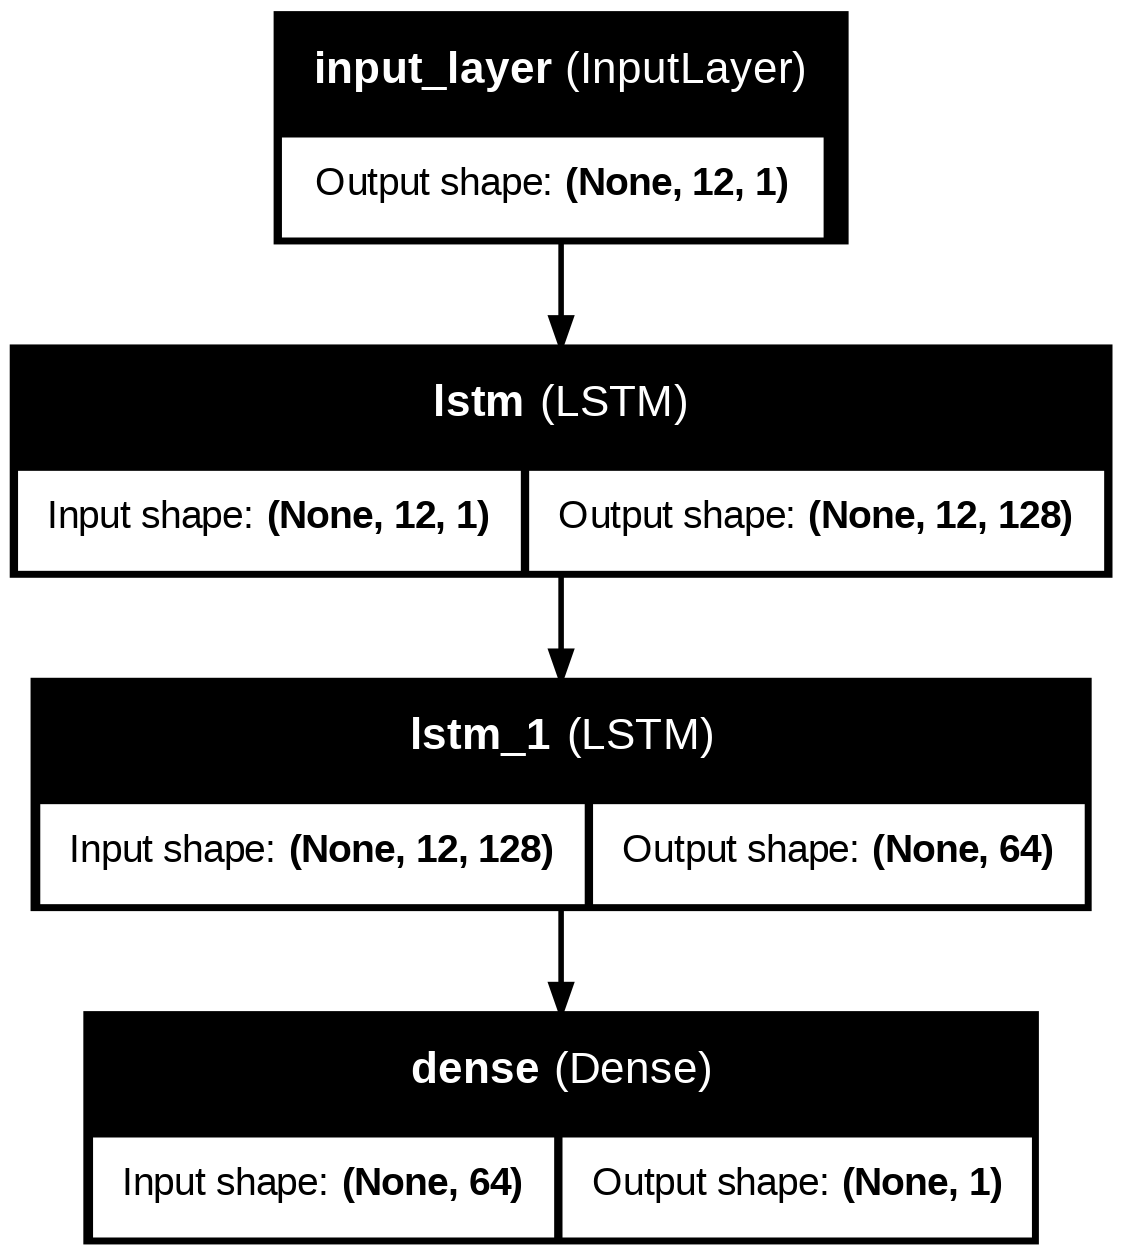

In [48]:
# Plot the model architecture
# The 'plot_model' function creates a graphical representation of the model structure
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Epoch 1/100
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1016
Epoch 1: loss improved from inf to 0.07778, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0921
Epoch 2/100
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0103
Epoch 2: loss improved from 0.07778 to 0.01504, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0122
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0162
Epoch 3: loss improved from 0.01504 to 0.01357, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0157
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0110
Epoch 4: loss improved from 0.01357 to 0.00983, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0108
Epoch 5/100
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0103 
Epoch 5: loss did not improve from 0.00983
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0107
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/s

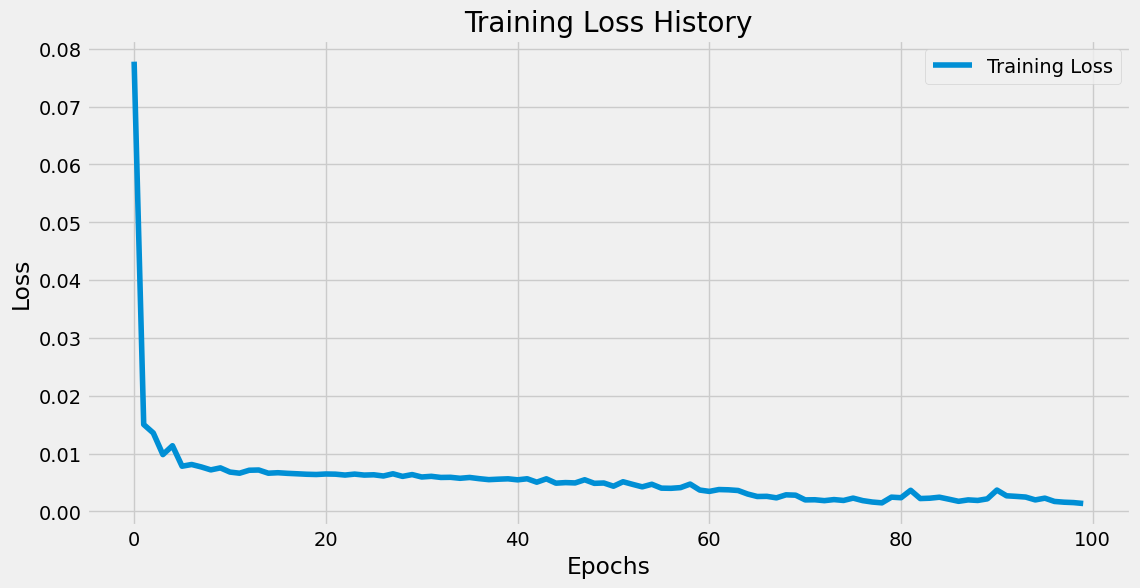

In [49]:
# Compile the model
# We are using the Adam optimizer for training and Mean Squared Error (MSE) as the loss function.
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Fit the model on the training data (X_train, y_train) for 100 epochs with a batch size of 32.
# The ModelCheckpoint callback is passed to save the best model during training.
history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[checkpoint_callback])

# Load the best model (the model with the lowest training loss)
best_model = load_model(checkpoint_filepath)

# Evaluate the best model on the test data (X_test, y_test)
# The loss will be printed for the test data using the best saved model.
loss = best_model.evaluate(X_test, y_test)
print('Test Loss with Best Model:', loss)

# Plot the history of the training loss
# The training loss over the epochs is plotted to visualize the model's performance during training.
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss History')
plt.xlabel('Epochs')  # X-axis represents the number of epochs
plt.ylabel('Loss')    # Y-axis represents the loss value
plt.legend()
plt.grid(True)  # Add grid lines to the plot for better readability
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


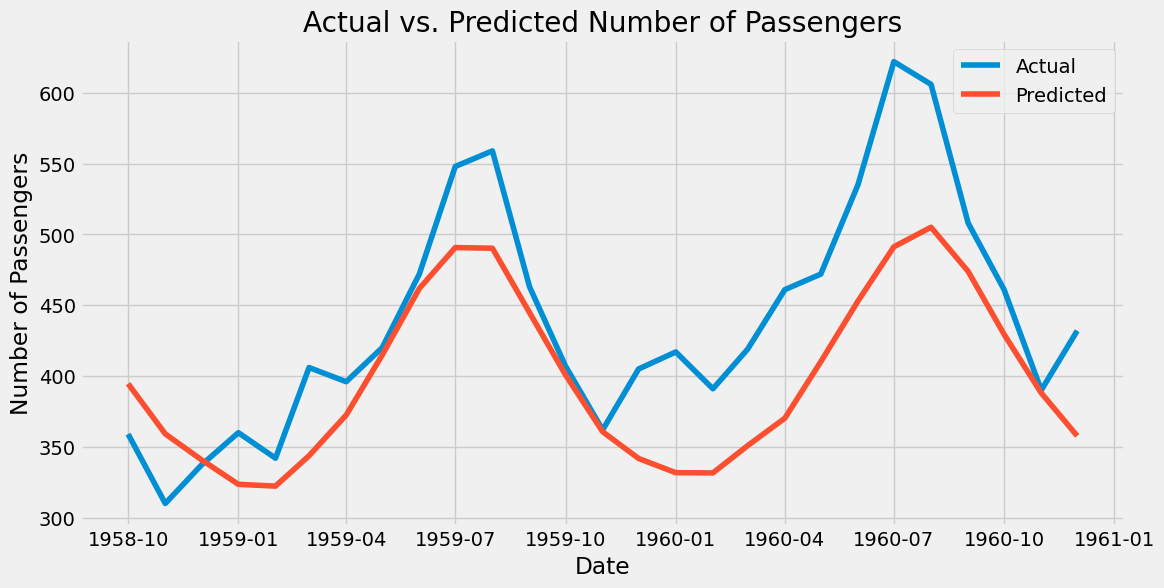

In [50]:
# Make predictions on the test data using the trained model
# The 'model.predict' function generates predictions for the test data (X_test)
predictions = model.predict(X_test)

# Inverse transform the predictions and actual test values to get the original scale
# The predictions and actual values are initially scaled using MinMaxScaler,
# so we inverse the scaling to convert the values back to the original range.
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))

# Plot actual values (y_test) against the corresponding dates from the data index
plt.plot(data.index[-len(y_test):], y_test, label='Actual')

# Plot the predicted values against the corresponding dates from the data index
plt.plot(data.index[-len(predictions):], predictions, label='Predicted')

# Label the x and y axes
plt.xlabel('Date')
plt.ylabel('Number of Passengers')

# Set the title for the plot
plt.title('Actual vs. Predicted Number of Passengers')

# Display the legend to differentiate actual and predicted values
plt.legend()

# Add gridlines for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()

In [51]:
# Calculate MSE, MAE using the test data and the corresponding predictions
mse_test_LSTM = mean_squared_error(y_test, predictions)
mae_test_LSTM = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error (MSE) for Test Set: {mse_test_LSTM}')
print(f'Mean Absolute Error (MAE) for Test Set: {mae_test_LSTM}')

Mean Squared Error (MSE) for Test Set: 3391.323223788015
Mean Absolute Error (MAE) for Test Set: 47.49201795789931


# <a name='Model_Comparison'></a>

<div style="border-radius:10px;
            background-color:#f5cd07;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
10. Model Comparison</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

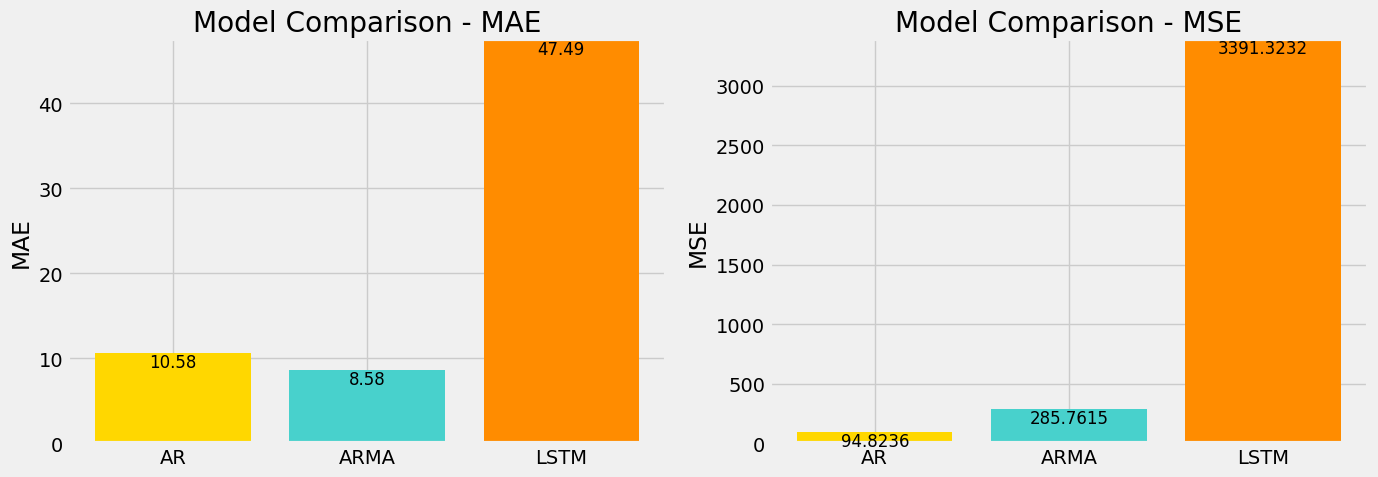

In [52]:
# MAE and MSE values for the three models
mae_values = [mae_test_AR, mae_test_ARMA, mae_test_LSTM]  # MAE values for AR, ARMA, and LSTM models
mse_values = [mse_test_AR, mse_test_ARMA, mse_test_LSTM]  # MSE values for AR, ARMA, and LSTM models
models = ['AR', 'ARMA', 'LSTM']  # Model names for the legend

# Create a figure with two subplots: one for MAE and one for MSE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Set colors for the bars in the plots
colors = ['gold', 'mediumturquoise', 'darkorange']

# Bar plot for MAE
bars_mae = ax1.bar(models, mae_values, color=colors)
ax1.set_title('Model Comparison - MAE')  # Title for MAE plot
ax1.set_ylabel('MAE')  # Label for y-axis of MAE plot
ax1.set_ylim(0, max(mae_values) + 0.05)  # Set y-axis limits to give space for the text labels

# Add the MAE values inside the bars near the top
for i, bar in enumerate(bars_mae):
    height = bar.get_height()  # Get the height of each bar
    # Place the MAE value text inside the bar, near the top
    ax1.text(bar.get_x() + bar.get_width() / 2, height - 0.02, f'{mae_values[i]:.2f}',
             ha='center', va='top', fontsize=12, color='black')

# Bar plot for MSE
bars_mse = ax2.bar(models, mse_values, color=colors)
ax2.set_title('Model Comparison - MSE')  # Title for MSE plot
ax2.set_ylabel('MSE')  # Label for y-axis of MSE plot
ax2.set_ylim(0, max(mse_values) + 0.005)  # Set y-axis limits to give space for the text labels

# Add the MSE values inside the bars near the top
for i, bar in enumerate(bars_mse):
    height = bar.get_height()  # Get the height of each bar
    # Place the MSE value text inside the bar, near the top
    ax2.text(bar.get_x() + bar.get_width() / 2, height - 1, f'{mse_values[i]:.4f}',
             ha='center', va='top', fontsize=12, color='black')

# Adjust layout for better spacing between the subplots
plt.tight_layout()

# Display the plots
plt.show()

In this section, we compare the performance of three different time series forecasting models: AR, ARMA, and LSTM. The models were evaluated based on two key performance metrics: Mean Squared Error (MSE) and Mean Absolute Error (MAE).

- **AR (Autoregressive Model)**:

  The AR model performs the best when evaluated using the Mean Squared Error (MSE). This indicates that, overall, it produces the smallest squared errors compared to the other models, making it the preferred choice when minimizing large errors is critical.

- **ARMA (Autoregressive Moving Average Model)**:

  On the other hand, the MAE (Mean Absolute Error) results indicate that the ARMA model provides the lowest average error in absolute terms. This suggests that ARMA is better at consistently predicting values that are close to the actual values, particularly when the size of individual prediction errors is a more important factor than large deviations.

- **LSTM (Long Short-Term Memory Model)**:

  The LSTM model, while a powerful tool for capturing long-term dependencies in time series data, performs significantly worse than both AR and ARMA models based on both MSE and MAE. This may be due to the complex nature of the LSTM architecture, which may not be well-suited for the relatively simpler time series patterns in this dataset, or it might require further tuning and optimization to improve its performance.

**Summary:**

- Best Model based on MSE: AR Model
- Best Model based on MAE: ARMA Model
- Model with the lowest performance: LSTM Model